In [1]:
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt

In [2]:
def scaling_F(ReDP, ReOD, a, b, initial_value=1):
    """
    Scaling function is a second degree polynomial
    :param ReDP: design spool speed
    :param ReOD: off-design spool speed
    :return: function value
    """
    return np.array(initial_value + a * ((ReOD - ReDP) / ReDP) + b * ((ReOD - ReDP) / ReDP) ** 2)

In [3]:
SF_design_point_TO = [0.99802762, 0.95000085, 0.99649734, 0.99076545, 0.99791594, 1.02033115,
                          0.97803967, 0.97923359]

In [4]:
# def plot_poly(file_name):
# #     GEnx_OD, GEnx_OD_true, N1cCEOD = pickle.load(open("CEOD_GEnx/" + file_name, "rb"))
# #     _, All_Reynolds = pickle.load(open("Constants/Reynolds_" + file_name.strip("CEOD_"), "rb"))
#     GEnx_OD, GEnx_OD_true, _, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))


# #     All_Reynolds = np.array([item for sublist in All_Reynolds for item in sublist])
# #     GEnx_OD = np.array([item for sublist in GEnx_OD for item in sublist])
# #     GEnx_OD_true = np.array([item for sublist in GEnx_OD_true for item in sublist])
    
#     print(All_Reynolds.shape)
#     Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
#     print(Re2)
    
#     Re25_DP = Re25[0]
#     Re19_DP = Re19[0]
#     Re3_DP = Re3[0]
#     Re49_DP = Re4[0]
#     Re5_DP = Re5[0]
    
#     for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
#                               [Re25_DP, Re19_DP, Re3_DP],
#                               ["Re25", "Re19", "Re3"])):
#         SF_pr = scaling_F(re_dp, re_i, X[0 + 6*i], X[1 + 6*i])
# #         print(X[0 + 6*i], X[1 + 6*i])
# #         print(SF_pr)
#         plt.scatter(re_i, SF_pr, label=label)
#     plt.title("SF PR")
#     plt.legend()
#     plt.show()

#     for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
#                                   [Re25_DP, Re19_DP, Re3_DP],
#                                   ["Re25", "Re19", "Re3"])):
#         SF_m = scaling_F(re_dp, re_i, X[2 + 6*i], X[3 + 6*i])
#         plt.scatter(re_i, SF_m, label=label)
#     plt.title("SF M")
#     plt.legend()
#     plt.show()

#     for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
#                                   [Re25_DP, Re19_DP, Re3_DP],
#                                   ["Re25", "Re19", "Re3"])):
#         SF_e = scaling_F(re_dp, re_i, X[4 + 6*i], X[5 + 6*i])
#         plt.scatter(re_i, SF_e, label=label)
#     plt.title("SF e")
#     plt.legend()
#     plt.show()
# file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled"
# # plot_poly(file_name)

In [5]:
X = [-0.09737036,  0.09429092, -0.09994714,  0.19372794, -0.02110662,  0.09311127,
 -0.08758217,  0.04846549,  0.05750697, -0.18643443 , 0.01754303, -0.08327033,
 -0.04006111,  0.02969302, -0.02456914 ,-0.06138784]


X_cruise = X
X_climb = X

file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled"
GEnx_OD, GEnx_OD_true, _, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))
Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, Re6, Re9 = All_Reynolds.T

print(Re6)
Re2_DP = Re2[0]
Re25_DP = Re25[0]
Re3_DP = Re3[0]
Re4_DP = Re4[0]
Re49_DP = Re49[0]
Re5_DP = Re5[0]
Re14_DP = Re14[0]
Re19_DP = Re19[0]
Re6_DP = Re6[0]

[4142826.68924511 4148426.67947017 4158732.49074052 4168905.77279164
 4154478.14754561 3950103.8622956  3344021.15621537 3334989.25560274
 2911759.18571941 2360025.12954256 1727486.73369645 1608706.6482204
 1515402.21207898 1468948.91417863 1437020.54322648]


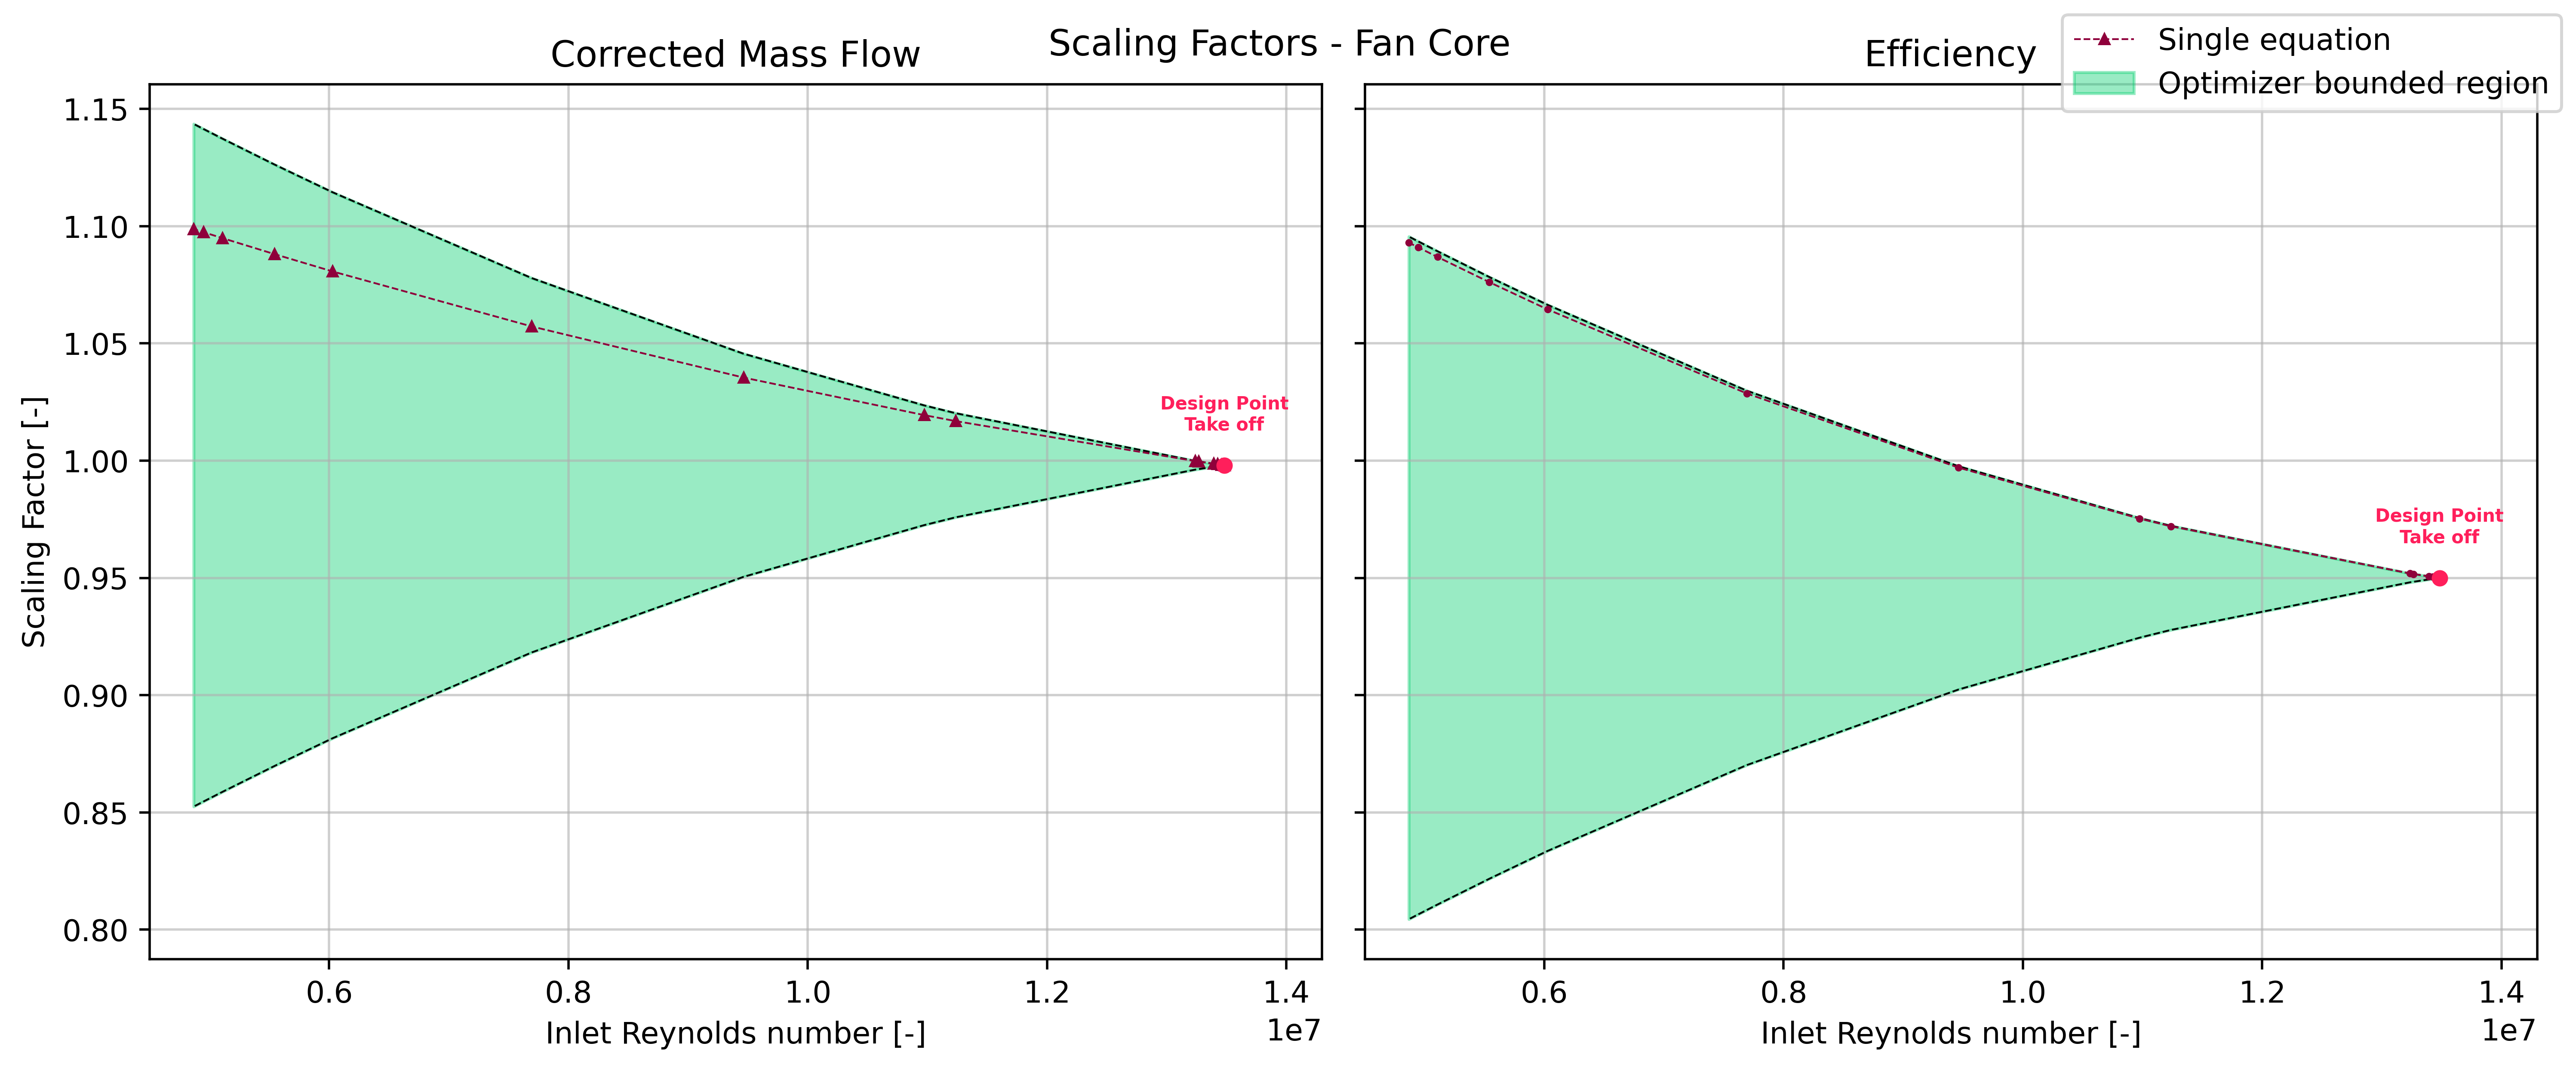

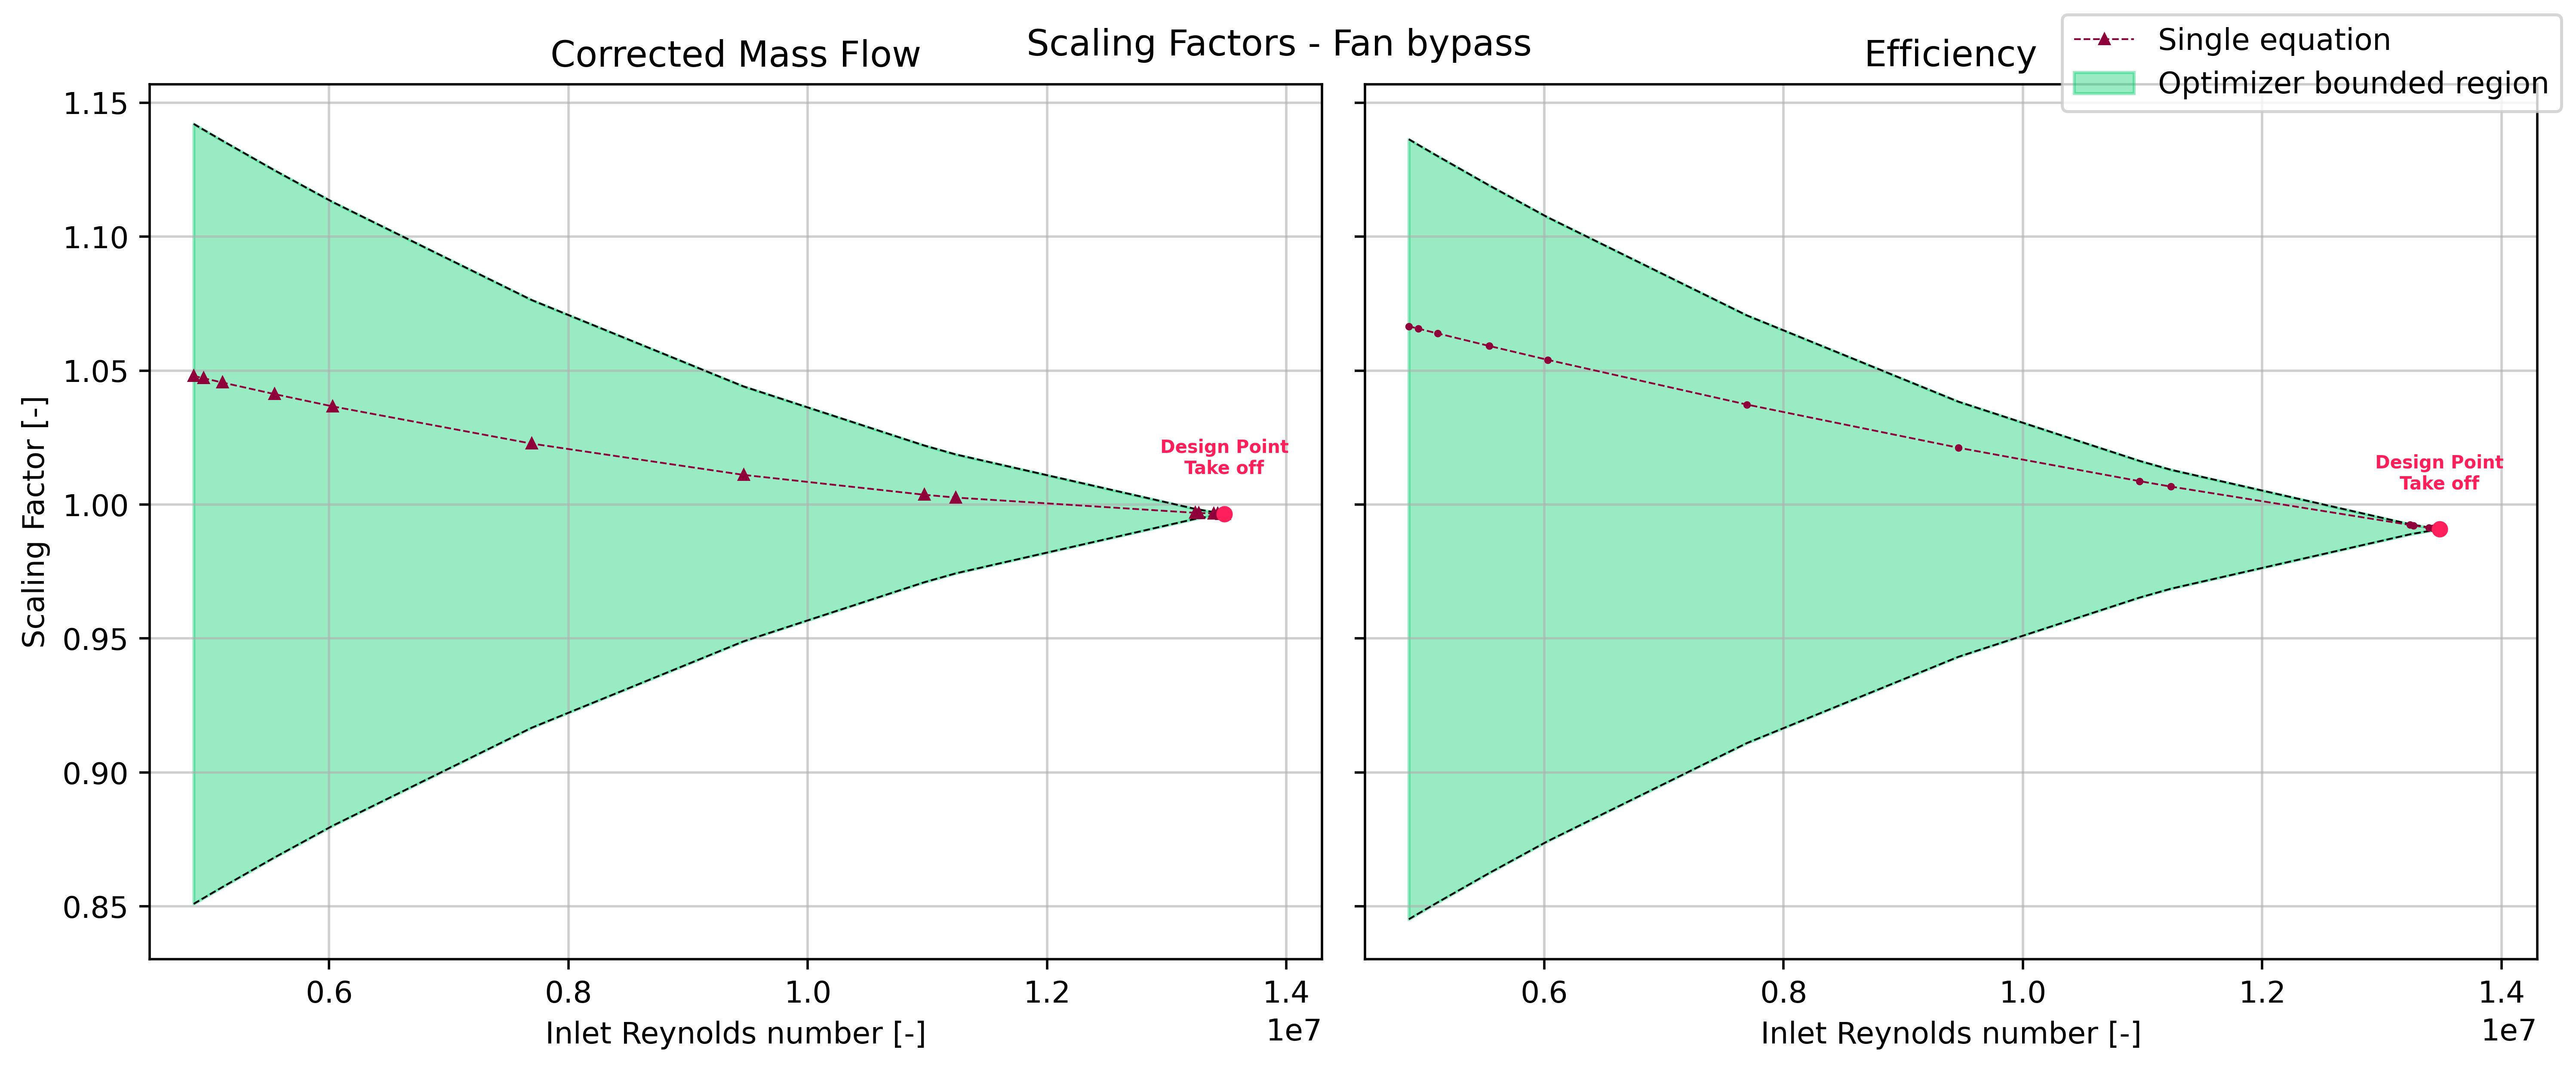

In [7]:
def plot_fan(ab_array, DP, OD, title, X_array, X_splines_climb, X_splines_cruise, initial_values):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=500, sharey='row')
    
    axes[0].grid(alpha=0.6)
    axes[1].grid(alpha=0.6)
    cmap = plt.get_cmap('viridis')
    lower_a, upper_a, lower_b, upper_b = ab_array
    
    OD = np.sort(OD)[::-1]

    fm_initial_value = initial_values[0]
    fe_initial_value = initial_values[1]
    
    y1_m = scaling_F(DP, OD, lower_a, upper_b, fm_initial_value)
    y2_m = scaling_F(DP, OD, upper_a, lower_b, fm_initial_value)
    
    y1_e = scaling_F(DP, OD, lower_a, upper_b, fe_initial_value)
    y2_e = scaling_F(DP, OD, upper_a, lower_b, fe_initial_value)
    
    
    SF_m_fan = scaling_F(DP, OD, X_array[0], X_array[1], fm_initial_value)
    
    SF_m_Takeoff = scaling_F(DP, OD[:5], 0, 0, fm_initial_value)
    SF_m_climb = scaling_F(DP, OD[5:10], X_splines_climb[0], X_splines_climb[1], fm_initial_value)
    SF_m_cruise = scaling_F(DP, OD[10:], X_splines_cruise[0], X_splines_cruise[1], fm_initial_value)
    SF_m_splines = np.concatenate((SF_m_Takeoff, SF_m_climb, SF_m_cruise))
    
    SF_e_fan = scaling_F(DP, OD, X_array[2], X_array[3], fe_initial_value)
    
    SF_e_Takeoff = scaling_F(DP, OD[:5], 0, 0, fe_initial_value)
    SF_e_climb = scaling_F(DP, OD[5:10], X_splines_climb[2], X_splines_climb[3], fe_initial_value)
    SF_e_cruise = scaling_F(DP, OD[10:], X_splines_cruise[2], X_splines_cruise[3], fe_initial_value)
    SF_e_splines = np.concatenate((SF_e_Takeoff, SF_e_climb, SF_e_cruise))
    
    inequality_mask_m = y1_m >= y2_m
    inequality_mask_e = y1_e >= y2_e

    axes[0].plot(OD, y1_m, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    axes[0].plot(OD, y2_m, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    
    plt.plot(OD, y1_e, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    plt.plot(OD, y2_e, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    
    #plot the scaling factors
    axes[0].plot(OD, SF_m_fan, marker="^", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation')
    
#     axes[0].plot(OD, SF_m_splines,
#              marker="v", color='#3C93C2', alpha=1, linewidth=0.6, linestyle = 'dashed',
#              markersize=3, label='Splines')
    
    axes[1].plot(OD, SF_e_fan, marker=".", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation')
    
#     axes[1].plot(OD, SF_e_splines, marker="s", color='#3C93C2', alpha=1, linewidth=0.6, linestyle = 'dashed', 
#              markersize=3, label='Splines')
    
    
    axes[0].fill_between(OD, y1_m, y2_m, where=inequality_mask_m, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    axes[1].fill_between(OD, y1_e, y2_e, where=inequality_mask_e, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    axes[0].scatter(DP, fm_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    axes[1].scatter(DP, fe_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    
    axes[0].text(DP, fm_initial_value + 0.015, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    axes[1].text(DP, fe_initial_value + 0.015, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    
    axes[0].set_ylabel("Scaling Factor [-]")
    axes[0].set_xlabel("Inlet Reynolds number [-]")
    axes[1].set_xlabel("Inlet Reynolds number [-]")
    
#     axes[0].legend(loc='upper right')
#     axes[1].legend(loc='upper right')
    fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
    
    axes[0].set_title('Corrected Mass Flow')
    axes[1].set_title('Efficiency')
    
    axes[0].set_xlim([0.45e07, 1.43e07])
    axes[1].set_xlim([0.45e07, 1.43e07])
    plt.tight_layout()
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + title + '.jpeg')
    
    fig.suptitle(title)
    plt.show()
    
ab_array = [-0.1, 0.1, -0.2, 0.2]
plot_fan(ab_array, Re2_DP, Re2, "Scaling Factors - Fan Core", X[:4],  X_climb[:4], X_cruise[:4], initial_values=SF_design_point_TO[0:2])
plot_fan(ab_array, Re2_DP, Re2, "Scaling Factors - Fan bypass", X[4:8],  X_climb[4:8], X_cruise[4:8], initial_values=SF_design_point_TO[2:4])

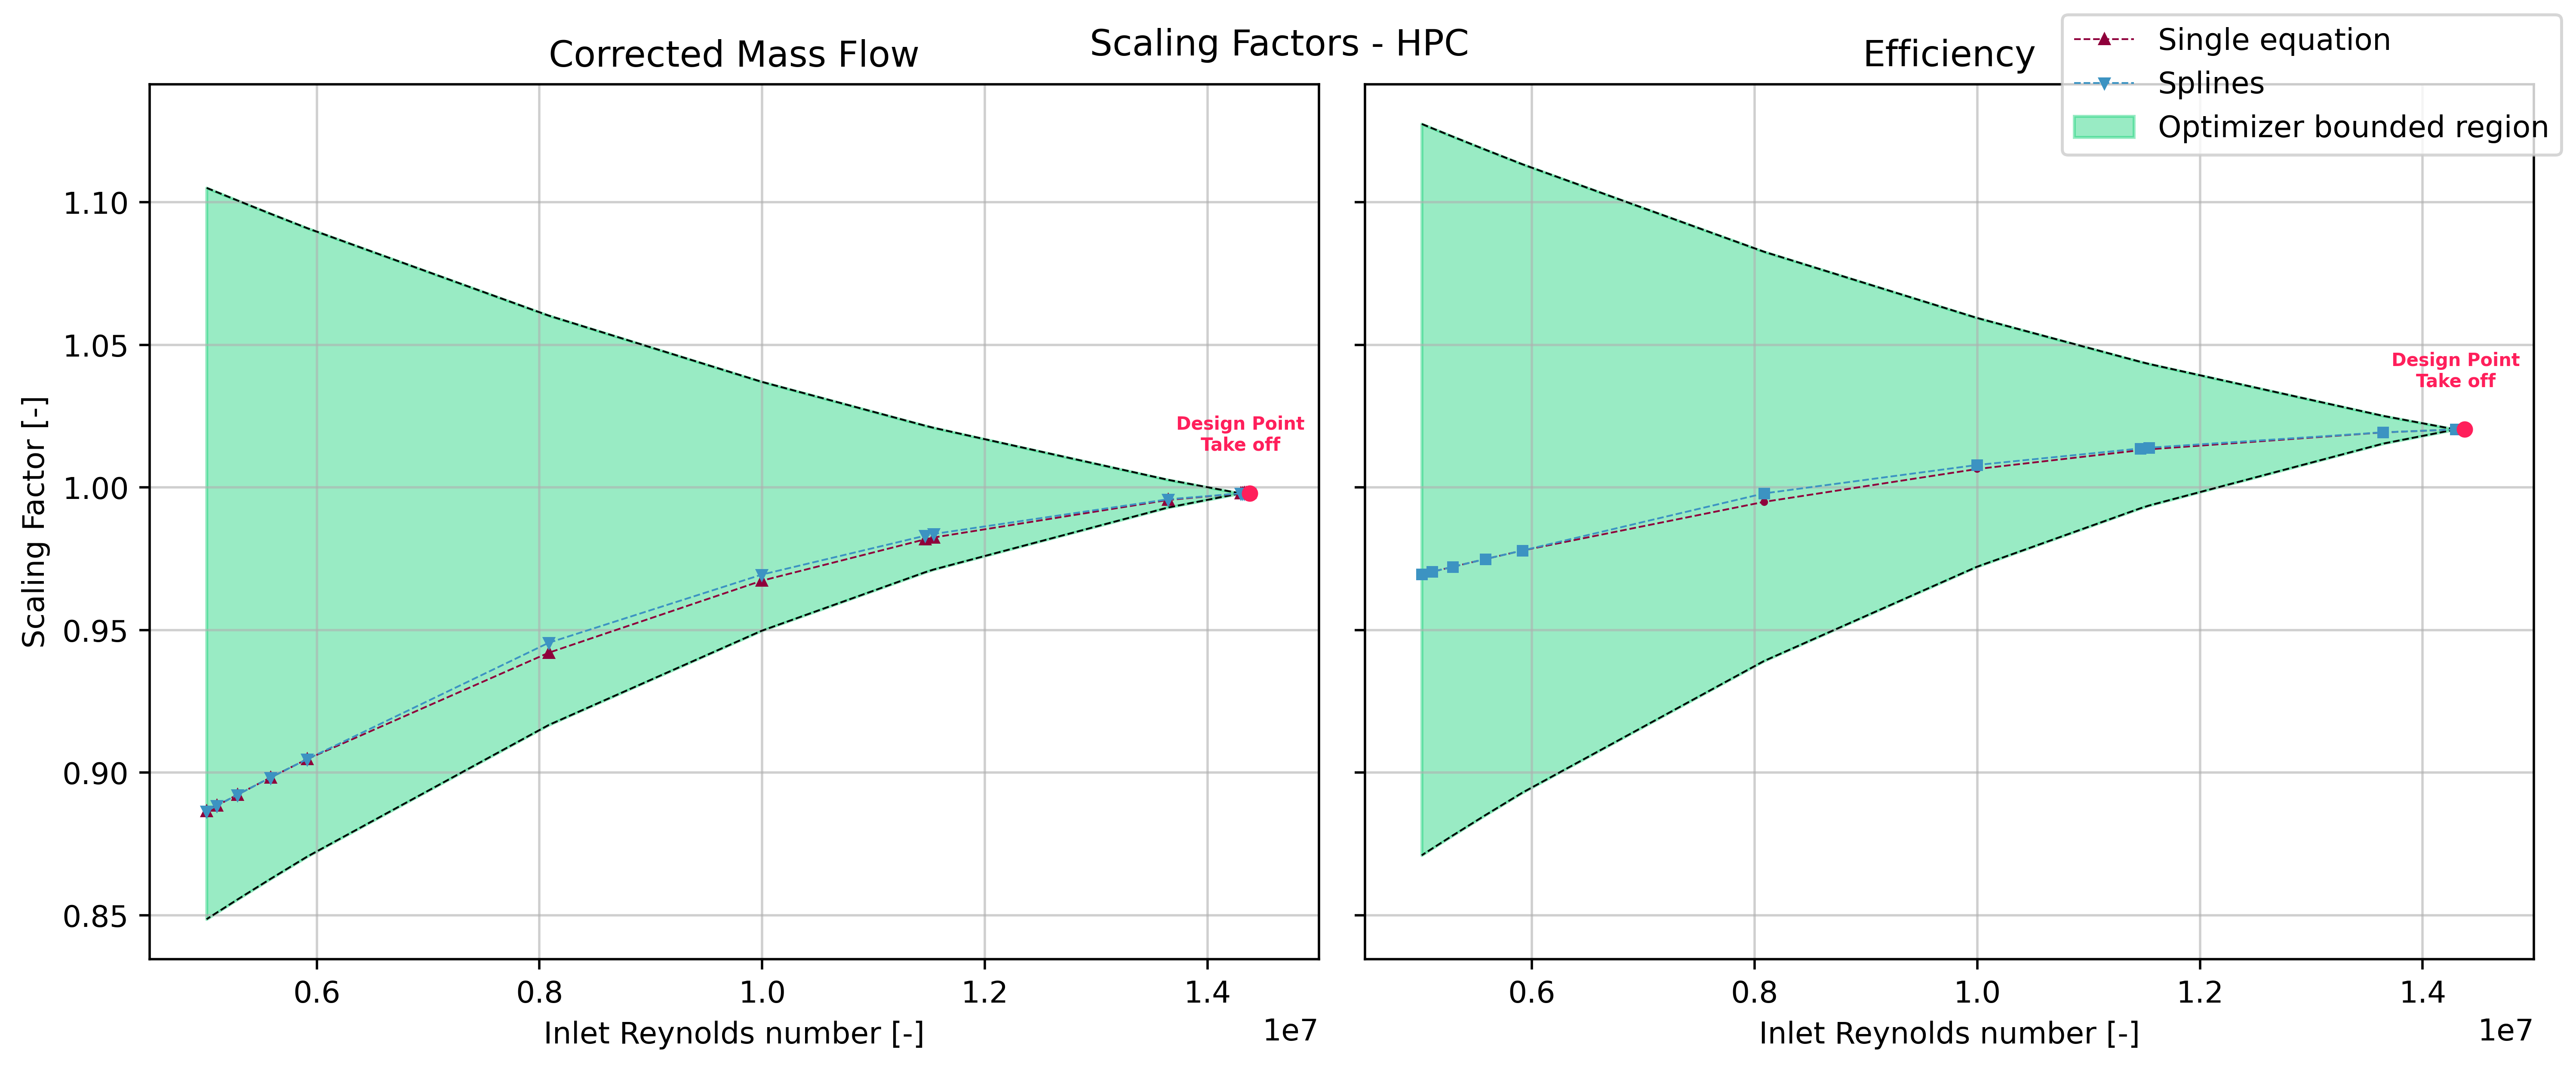

In [8]:
def plot_compressor(ab_array, DP, OD, title, X_input, X_splines_climb, X_splines_cruise, initial_values):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=500, sharey='row')
   
    axes[0].grid(alpha=0.6)
    axes[1].grid(alpha=0.6)
    cmap = plt.get_cmap('viridis')
    lower_a, upper_a, lower_b, upper_b = ab_array
    
    OD = np.sort(OD)[::-1]
    
    fm_initial_value = initial_values[0]
    fe_initial_value = initial_values[1]

    y1_m = scaling_F(DP, OD, lower_a, upper_b, fm_initial_value)
    y2_m = scaling_F(DP, OD, upper_a, lower_b, fm_initial_value)
    
    y1_e = scaling_F(DP, OD, lower_a, upper_b, fe_initial_value)
    y2_e = scaling_F(DP, OD, upper_a, lower_b, fe_initial_value)
    
    SF_m = scaling_F(DP, OD, X_input[0], X_input[1], fm_initial_value)
    SF_e = scaling_F(DP, OD, X_input[2], X_input[3], fe_initial_value)
    
    SF_m_Takeoff = scaling_F(DP, OD[:5], 0, 0, fm_initial_value)
    SF_m_climb = scaling_F(DP, OD[5:10], X_splines_climb[0], X_splines_climb[1], fm_initial_value)
    SF_m_cruise = scaling_F(DP, OD[10:], X_splines_cruise[0], X_splines_cruise[1], fm_initial_value)
    SF_m_splines = np.concatenate((SF_m_Takeoff, SF_m_climb, SF_m_cruise))
    
    SF_e_Takeoff = scaling_F(DP, OD[:5], 0, 0, fe_initial_value)
    SF_e_climb = scaling_F(DP, OD[5:10], X_splines_climb[2], X_splines_climb[3], fe_initial_value)
    SF_e_cruise = scaling_F(DP, OD[10:], X_splines_cruise[2], X_splines_cruise[3], fe_initial_value)
    SF_e_splines = np.concatenate((SF_e_Takeoff, SF_e_climb, SF_e_cruise))
    
    inequality_mask_m = y1_m >= y2_m
    inequality_mask_e = y1_e >= y2_e

    axes[0].plot(OD, y1_m, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    axes[0].plot(OD, y2_m, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    
    axes[1].plot(OD, y1_e, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    axes[1].plot(OD, y2_e, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)

    
    #plot the scaling factors
       
    axes[0].plot(OD, SF_m, marker="^", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation')
    
    axes[0].plot(OD, SF_m_splines,
             marker="v", color='#3C93C2', alpha=1, linewidth=0.6, linestyle = 'dashed',
             markersize=3, label='Splines')
    
    axes[1].plot(OD, SF_e, marker=".", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation')
    
    axes[1].plot(OD, SF_e_splines, marker="s", color='#3C93C2', alpha=1, linewidth=0.6, linestyle = 'dashed', 
             markersize=3, label='Splines')

    axes[0].fill_between(OD, y1_m, y2_m, where=inequality_mask_m, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    axes[1].fill_between(OD, y1_e, y2_e, where=inequality_mask_e, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    
    axes[0].scatter(np.max(OD), fm_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    axes[1].scatter(np.max(OD), fe_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    
    axes[0].text(DP, fm_initial_value + 0.015, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    axes[1].text(DP, fe_initial_value + 0.015, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    
    axes[0].set_ylabel("Scaling Factor [-]")
    axes[0].set_xlabel("Inlet Reynolds number [-]")
    axes[1].set_xlabel("Inlet Reynolds number [-]")
    
#     axes[0].legend(loc='upper right')
#     axes[1].legend(loc='upper right')
    fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
    
    axes[0].set_title('Corrected Mass Flow')
    axes[1].set_title('Efficiency')
    
    axes[0].set_xlim([0.45e07, 1.5e07])
    axes[1].set_xlim([0.45e07, 1.5e07])
    plt.tight_layout()
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + title + '.jpeg')
    fig.suptitle(title)
    plt.show()

ab_array = [-0.1, 0.1, -0.2, 0.1]
plot_compressor(ab_array, Re25_DP, Re25, "Scaling Factors - HPC", X[8:12],  X_climb[8:12], X_cruise[8:12], initial_values=SF_design_point_TO[4:6])

In [9]:
def plot_turbine(ab_array, DP, OD, title, X_input, X_splines_climb, X_splines_cruise, initial_values):
    plt.figure(figsize=(6, 5), dpi=500)
    plt.title("Efficiency")
    plt.grid(alpha=0.6)
    cmap = plt.get_cmap('viridis')
    lower_a, upper_a, lower_b, upper_b = ab_array
    
    OD = np.sort(OD)[::-1]

    fe_initial_value = initial_values[0]
    
    y1 = scaling_F(DP, OD, lower_a, upper_b, fe_initial_value)
    y2 = scaling_F(DP, OD, upper_a, lower_b, fe_initial_value)
    
    SF_e_one_eq = scaling_F(DP, OD, X_input[0], X_input[1], fe_initial_value)
    
    SF_e_Takeoff = scaling_F(DP, OD[:5], 0, 0, fe_initial_value)
    SF_e_climb= scaling_F(DP, OD[5:10], X_splines_climb[0], X_splines_climb[1], fe_initial_value)
    SF_e_cruise= scaling_F(DP, OD[10:], X_splines_cruise[0], X_splines_cruise[1], fe_initial_value)
    
    
    SF_splines = np.concatenate((SF_e_Takeoff, SF_e_climb, SF_e_cruise))
#     OD_splines = np.concatenate((OD[5:10], OD[10:]))
    
    inequality_mask = y1 >= y2
    plt.plot(OD, y1, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    plt.plot(OD, y2, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    
#     plot the scaling factors
    plt.plot(OD, SF_e_one_eq, marker=".", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation - efficiency')
    plt.plot(OD, SF_splines,
             marker="s", color='#3C93C2', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Splines - efficiency')
    
    
    plt.fill_between(OD, y1, y2, where=inequality_mask, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    plt.scatter(np.max(OD), fe_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    plt.text(np.max(OD), fe_initial_value + 0.015, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    
    plt.ylabel("Scaling Factor [-]")
    plt.xlabel("Inlet Reynolds number [-]")
    plt.legend()
    plt.xlim([1e07, 3.34e07]) if 'HPT' in title else plt.xlim([0.6e07, 2.15e07])
    
    plt.tight_layout()
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + title + '.jpeg')
#     fig.suptitle(title)
    plt.show()

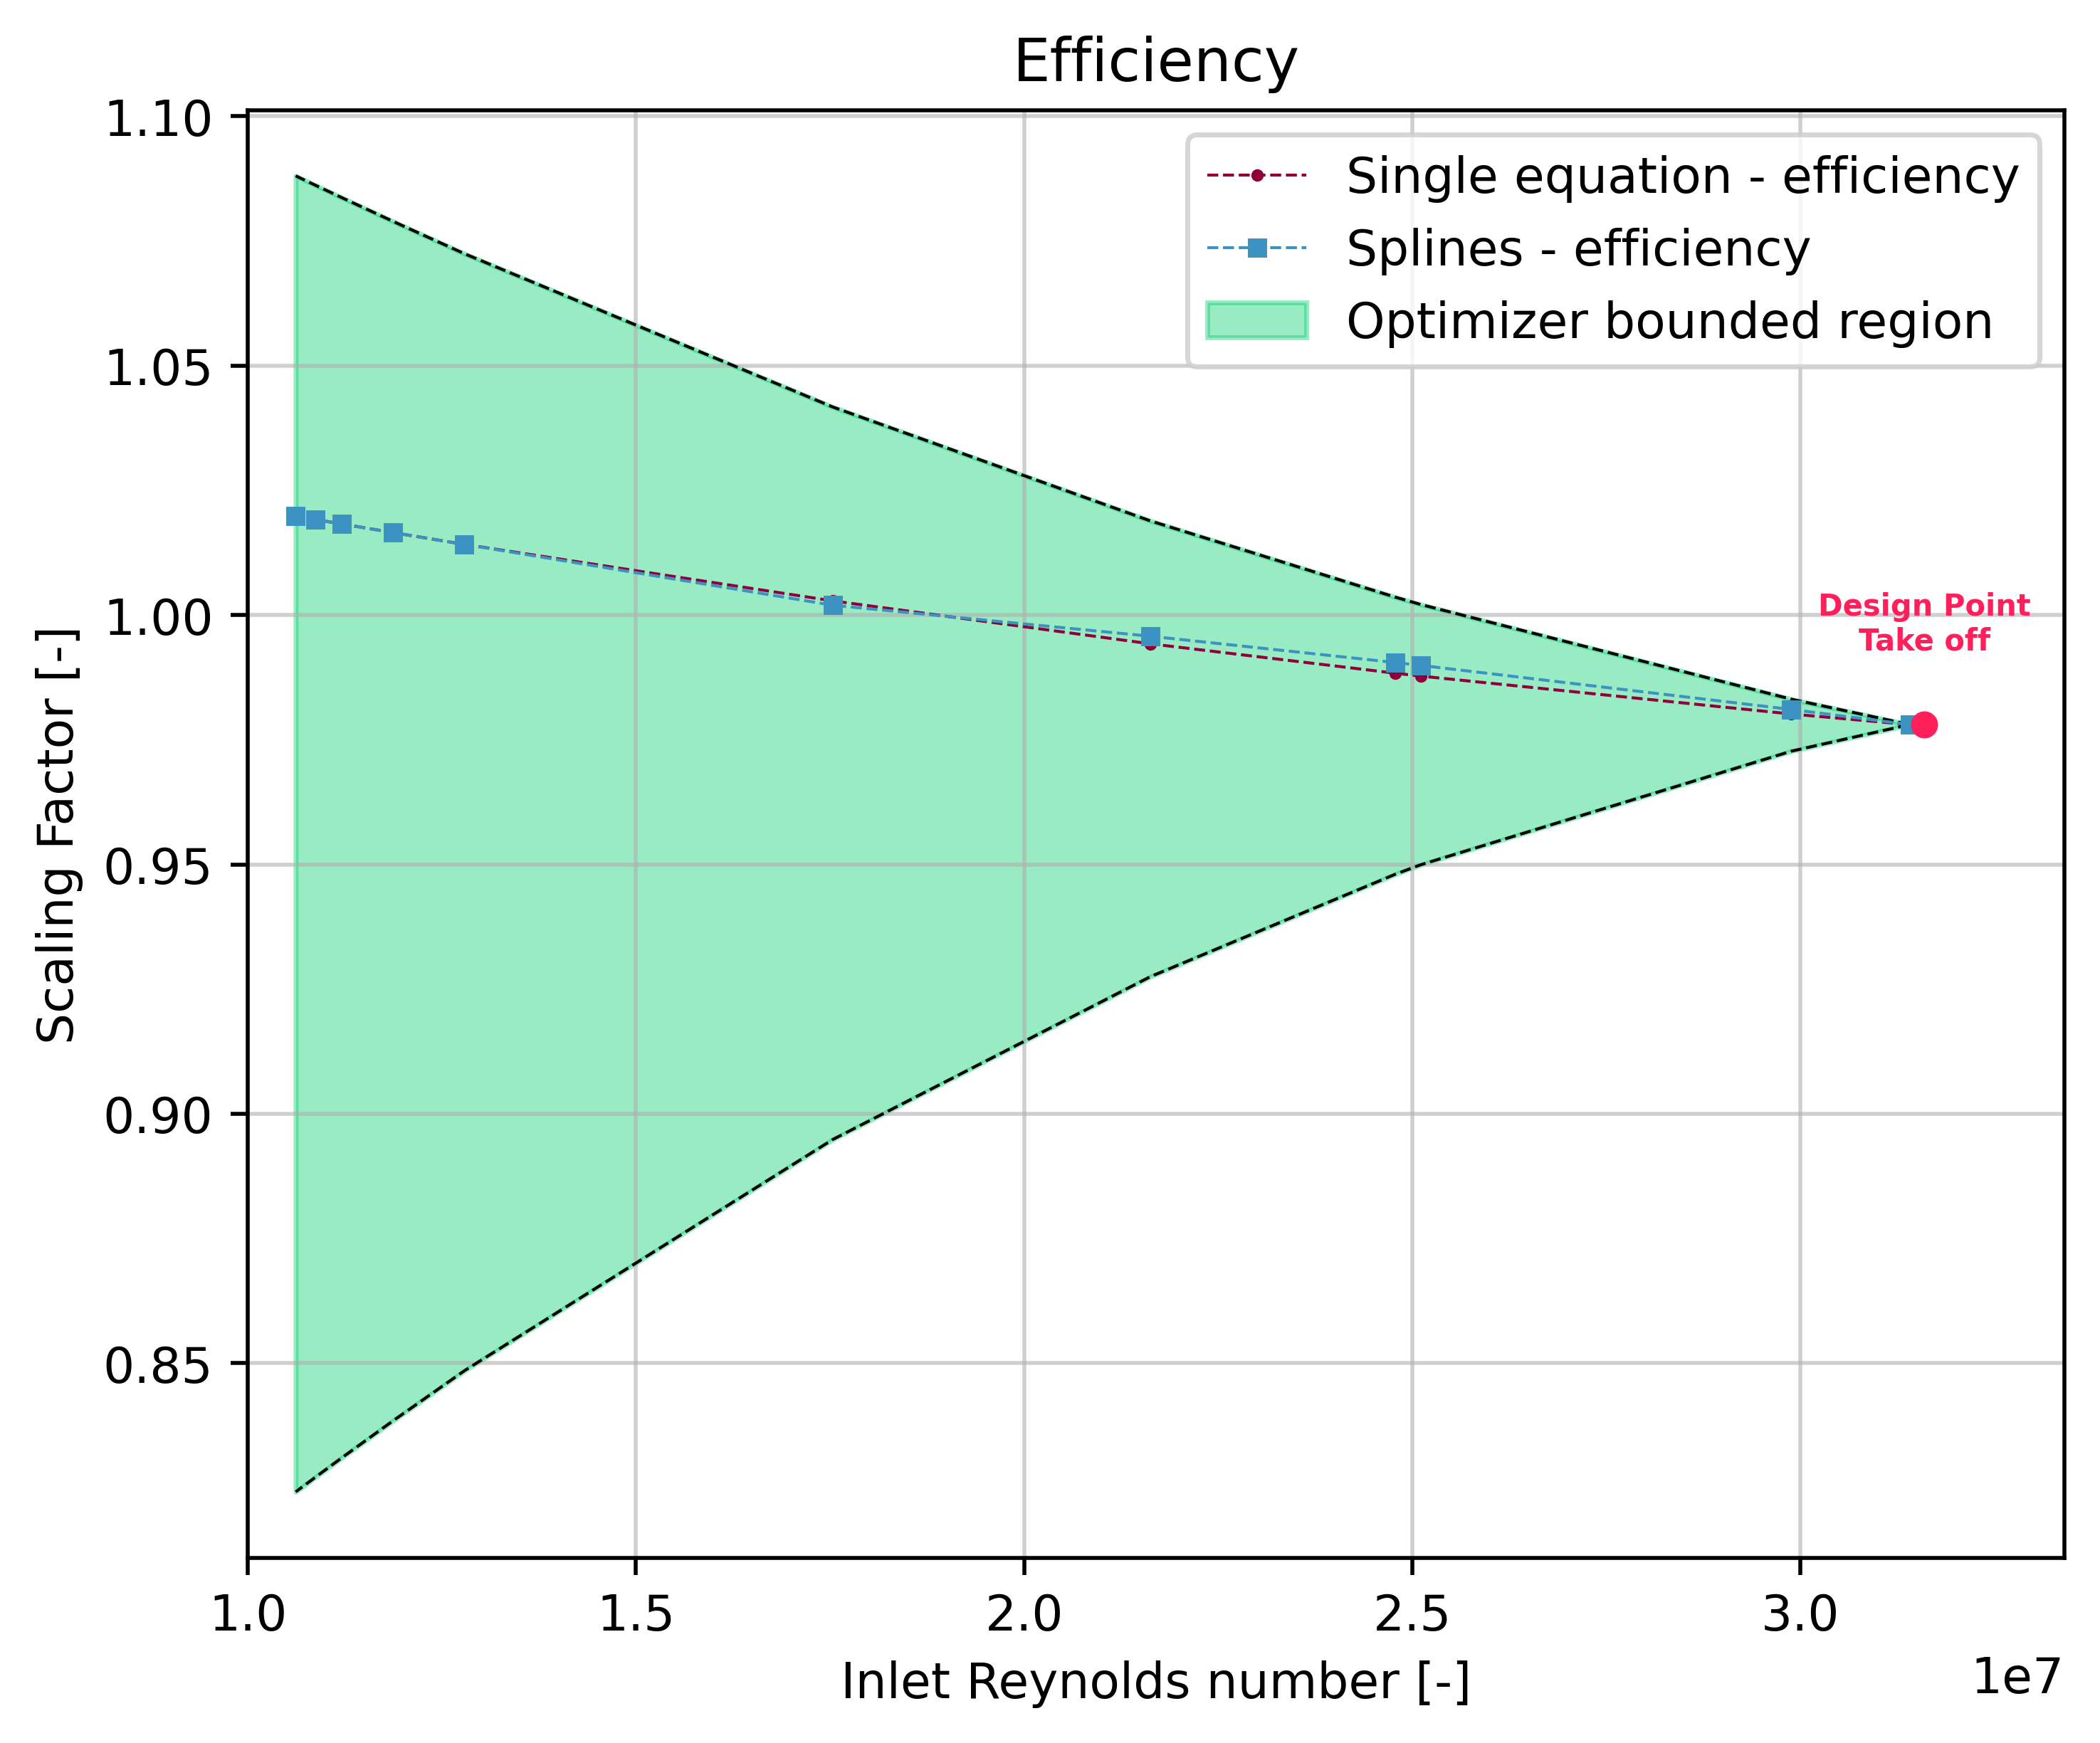

In [10]:
ab_array = [-0.1, 0.1, -0.2, 0.1]
plot_turbine(ab_array, Re4_DP, Re4, "Scaling Factors - HPT", X[12:14], X_climb[12:14], X_cruise[12:14], initial_values=SF_design_point_TO[6:7])

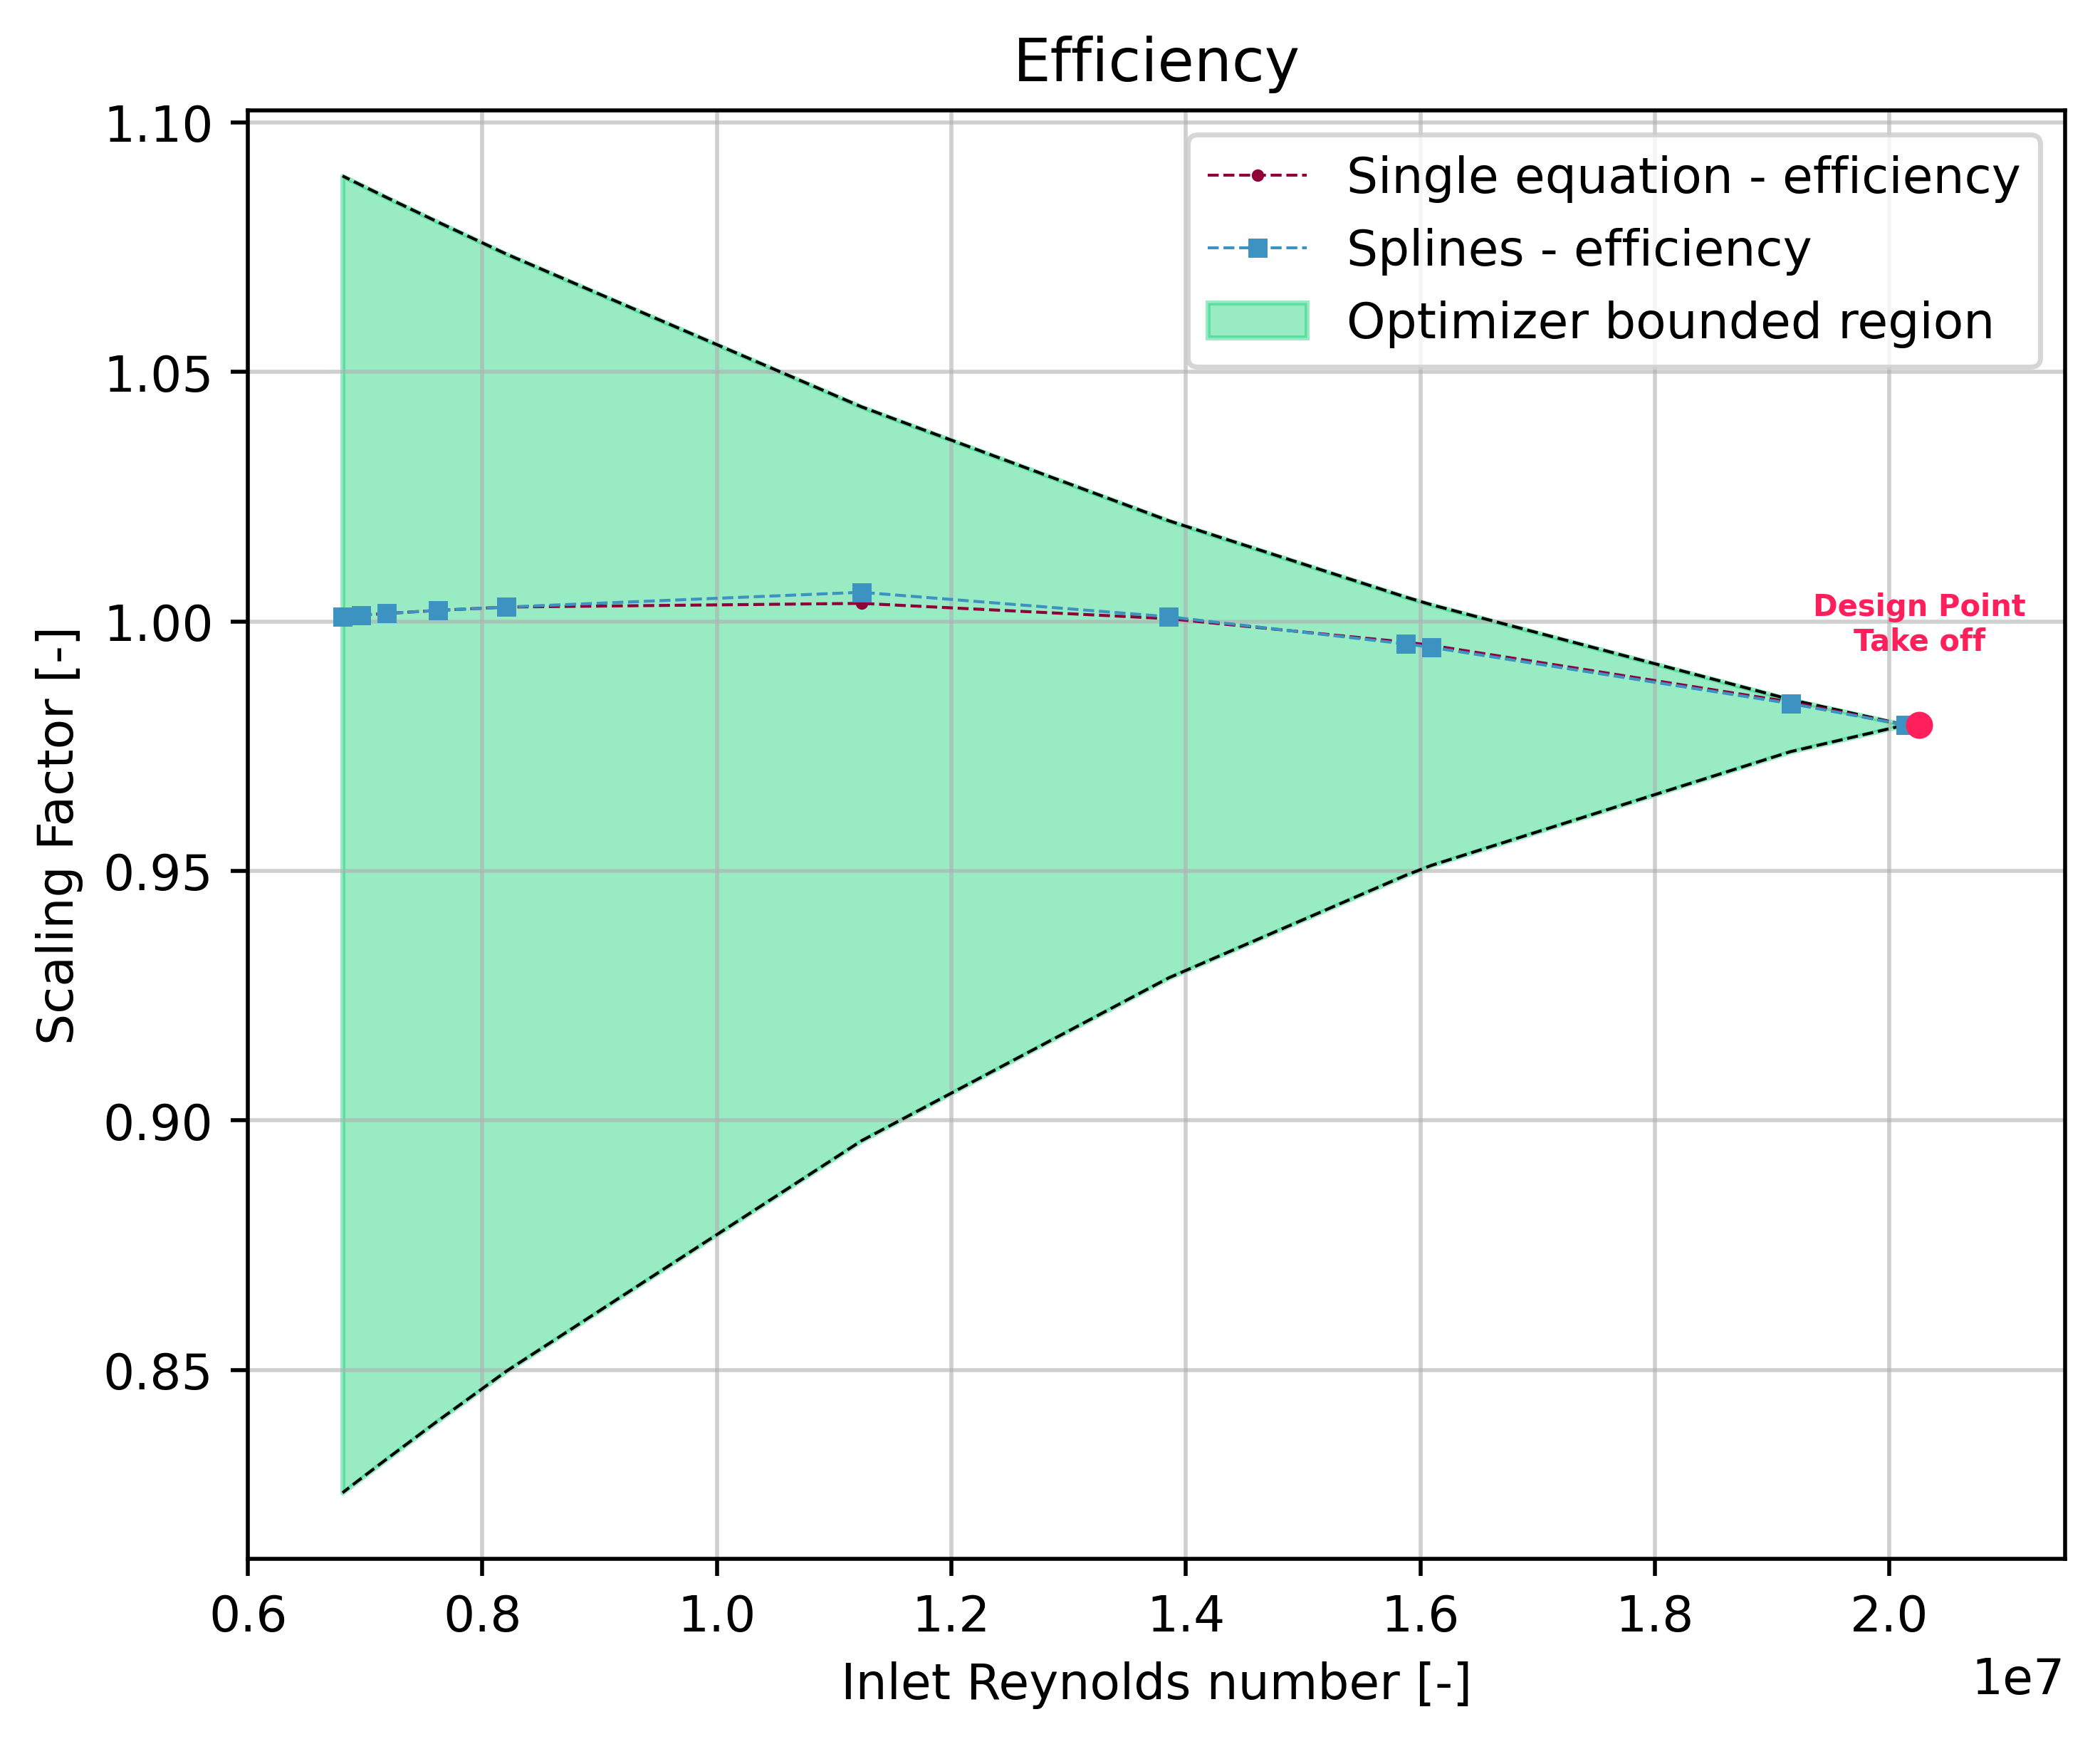

In [11]:
ab_array = [-0.1, 0.1, -0.2, 0.1]
plot_turbine(ab_array, Re49_DP, Re49, "Scaling Factors - LPT", X[14:16], X_climb[14:16], X_cruise[14:16],initial_values=SF_design_point_TO[7:8])

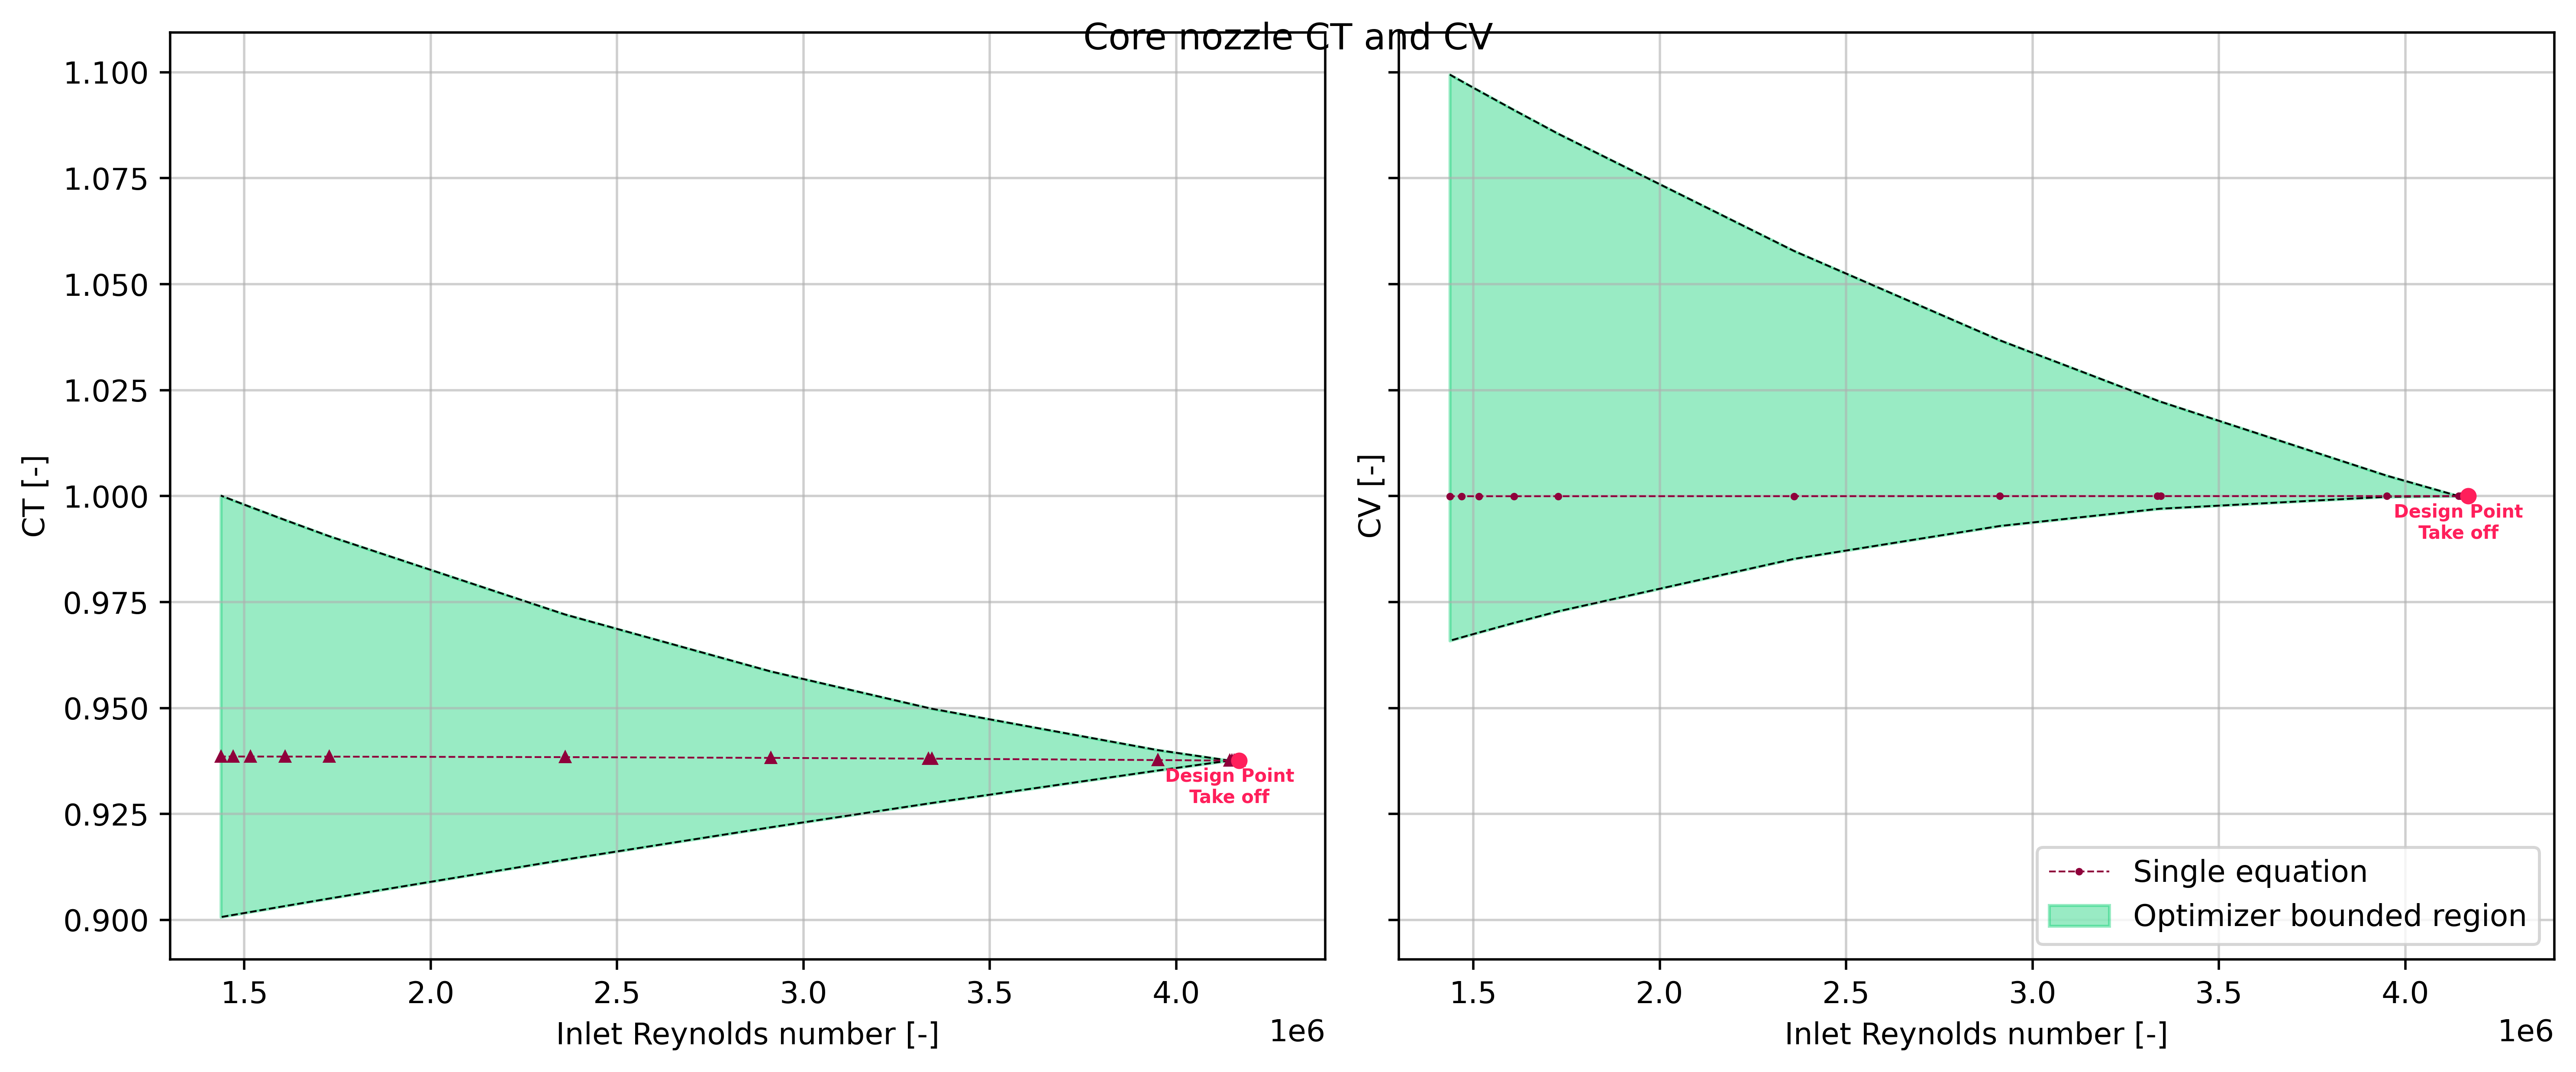

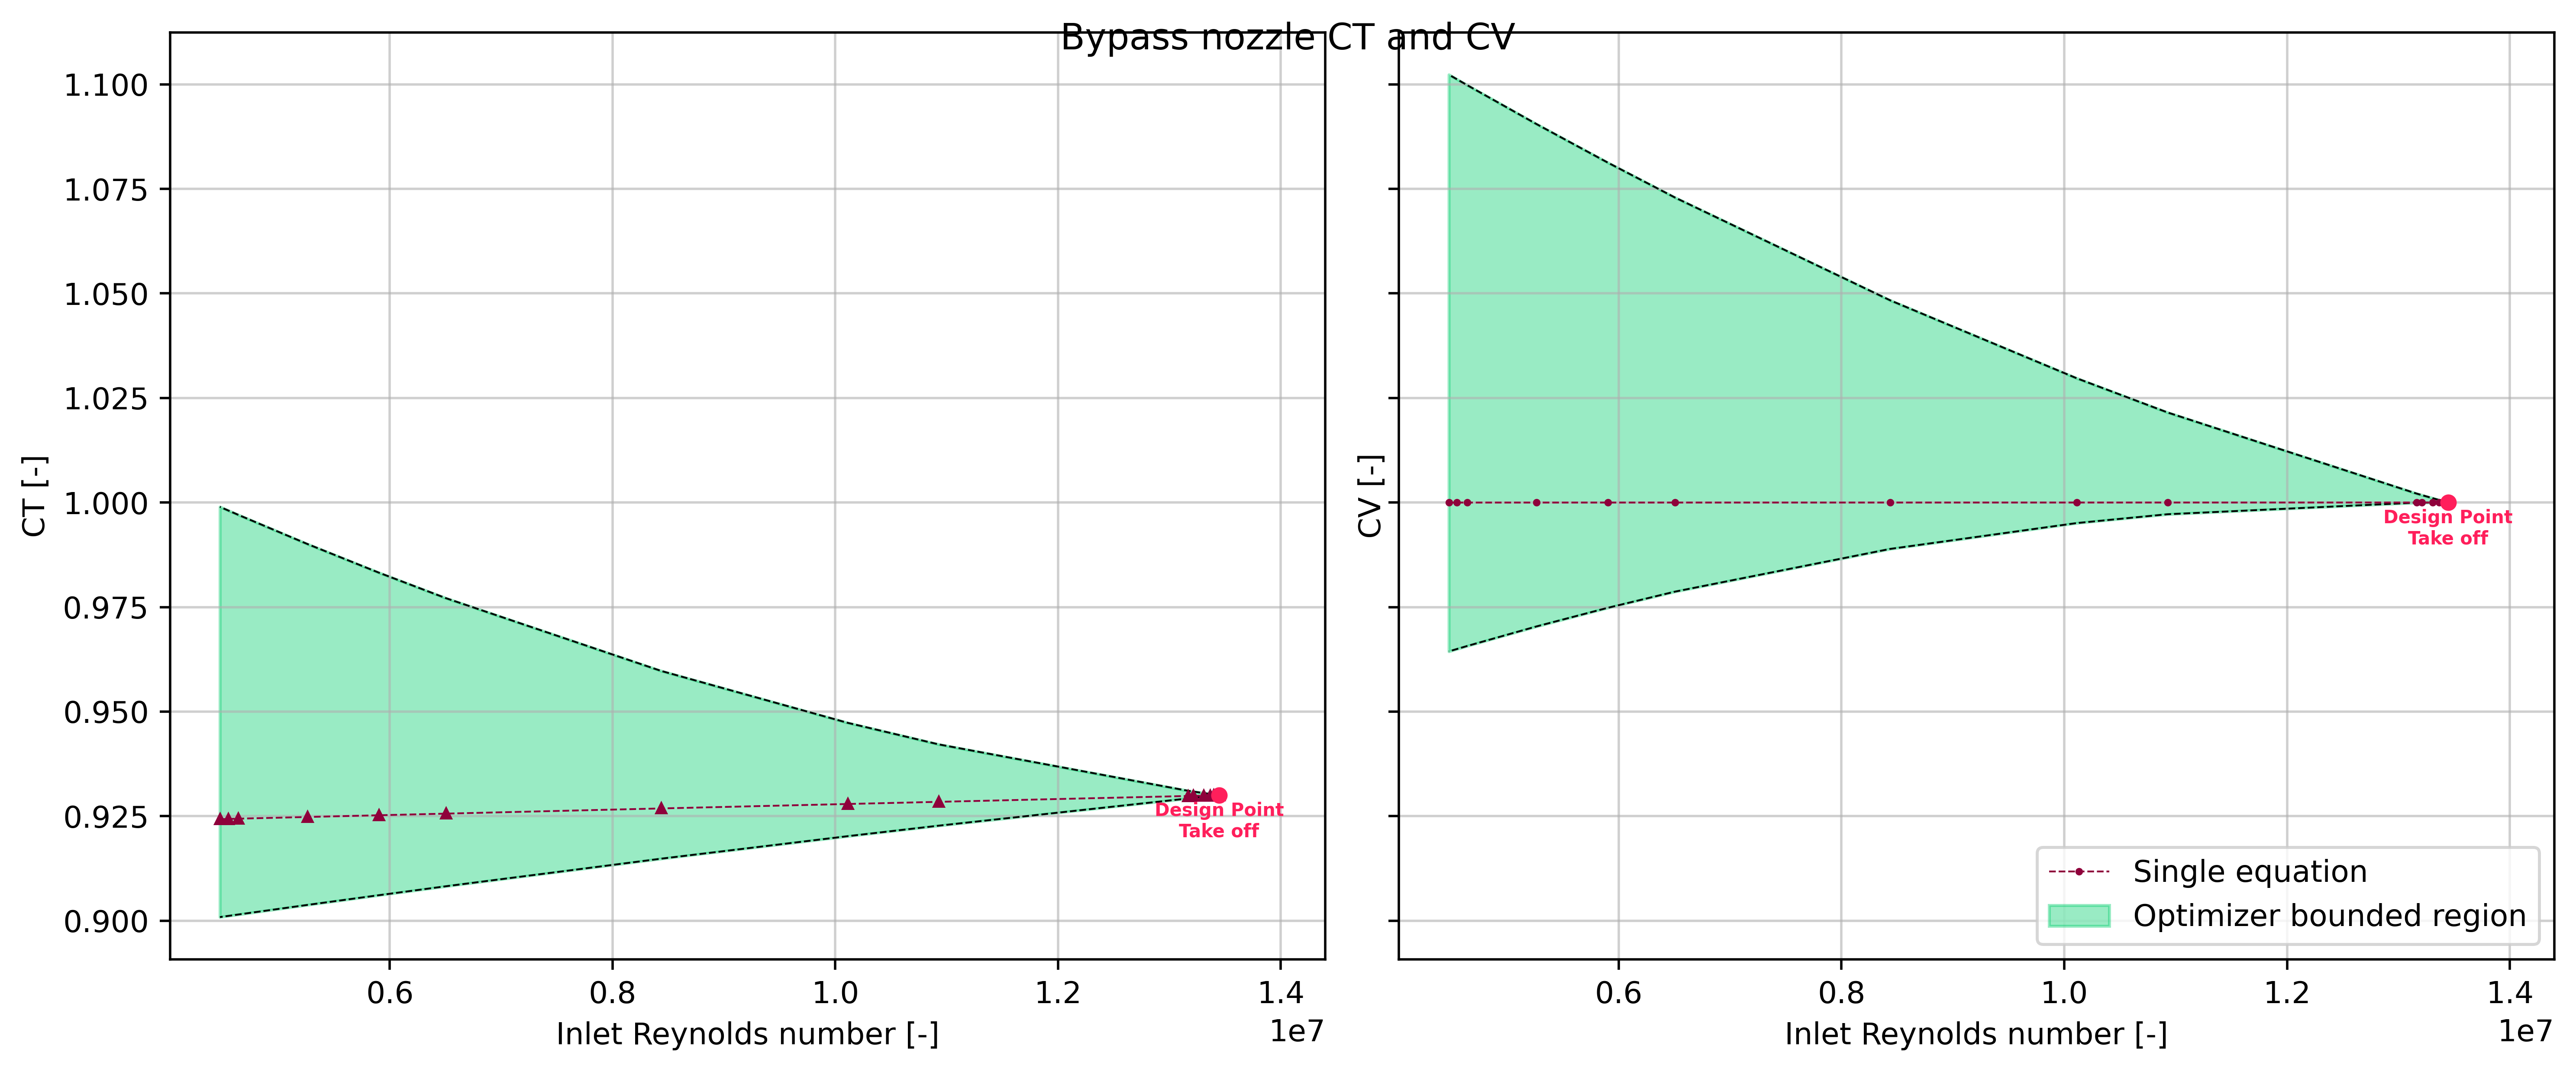

In [24]:
def plot_nozzle(ab_array, DP, OD, title, X_input, initial_values):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=500, sharey='row')
   
    axes[0].grid(alpha=0.6)
    axes[1].grid(alpha=0.6)
    cmap = plt.get_cmap('viridis')
    lower_aCX, upper_aCX, lower_bCX, upper_bCX,\
    lower_aCV, upper_aCV, lower_bCV, upper_bCV = ab_array
    
    OD = np.sort(OD)[::-1]
    
    fCX_initial_value = initial_values[0]
    fCV_initial_value = initial_values[1]

    y1_CX = scaling_F(DP, OD, lower_aCX, upper_bCX, fCX_initial_value)
    y2_CX = scaling_F(DP, OD, upper_aCX, lower_bCX, fCX_initial_value)
    
    y1_CV = scaling_F(DP, OD, lower_aCV, upper_bCV, fCV_initial_value)
    y2_CV = scaling_F(DP, OD, upper_aCV, lower_bCV, fCV_initial_value)
    
    SF_CX = scaling_F(DP, OD, X_input[0], X_input[1], fCX_initial_value)
    SF_CV = scaling_F(DP, OD, X_input[2], X_input[3], fCV_initial_value)
    
    
    inequality_mask_CX = y1_CX >= y2_CX
    inequality_mask_CV = y1_CV >= y2_CV

    axes[0].plot(OD, y1_CX, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    axes[0].plot(OD, y2_CX, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    
    axes[1].plot(OD, y1_CV, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)
    axes[1].plot(OD, y2_CV, color='black',
                     alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3)

    
    #plot the scaling factors
       
    axes[0].plot(OD, SF_CX, marker="^", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation')
    

    axes[1].plot(OD, SF_CV, marker=".", color='#8F003B', 
             alpha=1, linewidth=0.6, linestyle = 'dashed', markersize=3, label='Single equation')
    axes[0].fill_between(OD, y1_CX, y2_CX, where=inequality_mask_CX, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    axes[1].fill_between(OD, y1_CV, y2_CV, where=inequality_mask_CV, 
                     color='#00CD6C', alpha=0.4, label='Optimizer bounded region')
    
    
    axes[0].scatter(np.max(OD), fCX_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    axes[1].scatter(np.max(OD), fCV_initial_value, marker='.', c='#FF1F5B', s=80, zorder=np.inf)
    
    axes[0].text(DP, fCX_initial_value - 0.01, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    axes[1].text(DP, fCV_initial_value - 0.01, 'Design Point\nTake off', c='#FF1F5B', fontsize=6, horizontalalignment='center', weight='bold')
    
    axes[0].set_ylabel("CT [-]")
    axes[1].set_ylabel("CV [-]")
    axes[0].set_xlabel("Inlet Reynolds number [-]")
    axes[1].set_xlabel("Inlet Reynolds number [-]")
    
#     axes[0].legend(loc='upper right')
    axes[1].legend(loc='lower right')
#     fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='lower right')
    
#     axes[0].set_title('Corrected Mass Flow')
#     axes[1].set_title('Efficiency')
    
    if 'Core' in title: 
        axes[0].set_xlim(None, 4.4e06)
        axes[1].set_xlim(None, 4.4e06)
    else:
        axes[0].set_xlim(None, 1.44e07)
        axes[1].set_xlim(None, 1.44e07)
#     axes[1].set_xlim([0.45e07, 1.5e07])
    plt.tight_layout()
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + title + '.jpeg')
    fig.suptitle(title)
    plt.show()

    
X = [-2.71460256e-03, -1.90161266e-03, 2.39860677e-05, -4.37042293e-05,
         8.34522730e-03, -3.18924184e-04, 1.37287080e-05, -5.69453862e-06]
ab_array = [-0.05, 0.05, -0.01, 0.07,
            -0.1, 0.0, -0.08, 0.08]
plot_nozzle(ab_array, Re6_DP, Re6, "Core nozzle CT and CV", X[:4], initial_values=[0.9376, 1])
# plot_nozzle(ab_array, Re6_DP, Re6, "Core nozzle", None, initial_values=[1, 1])

ab_array = [-0.05, 0.037, -0.01, 0.08,
           -0.1, 0.0, -0.08, 0.08]
plot_nozzle(ab_array, Re14_DP, Re14, "Bypass nozzle CT and CV", X[4:], initial_values=[0.93, 1])
# plot_nozzle(ab_array, Re14_DP, Re14, "Bypass nozzle", None, initial_values=[1, 1])
# print(Re14)

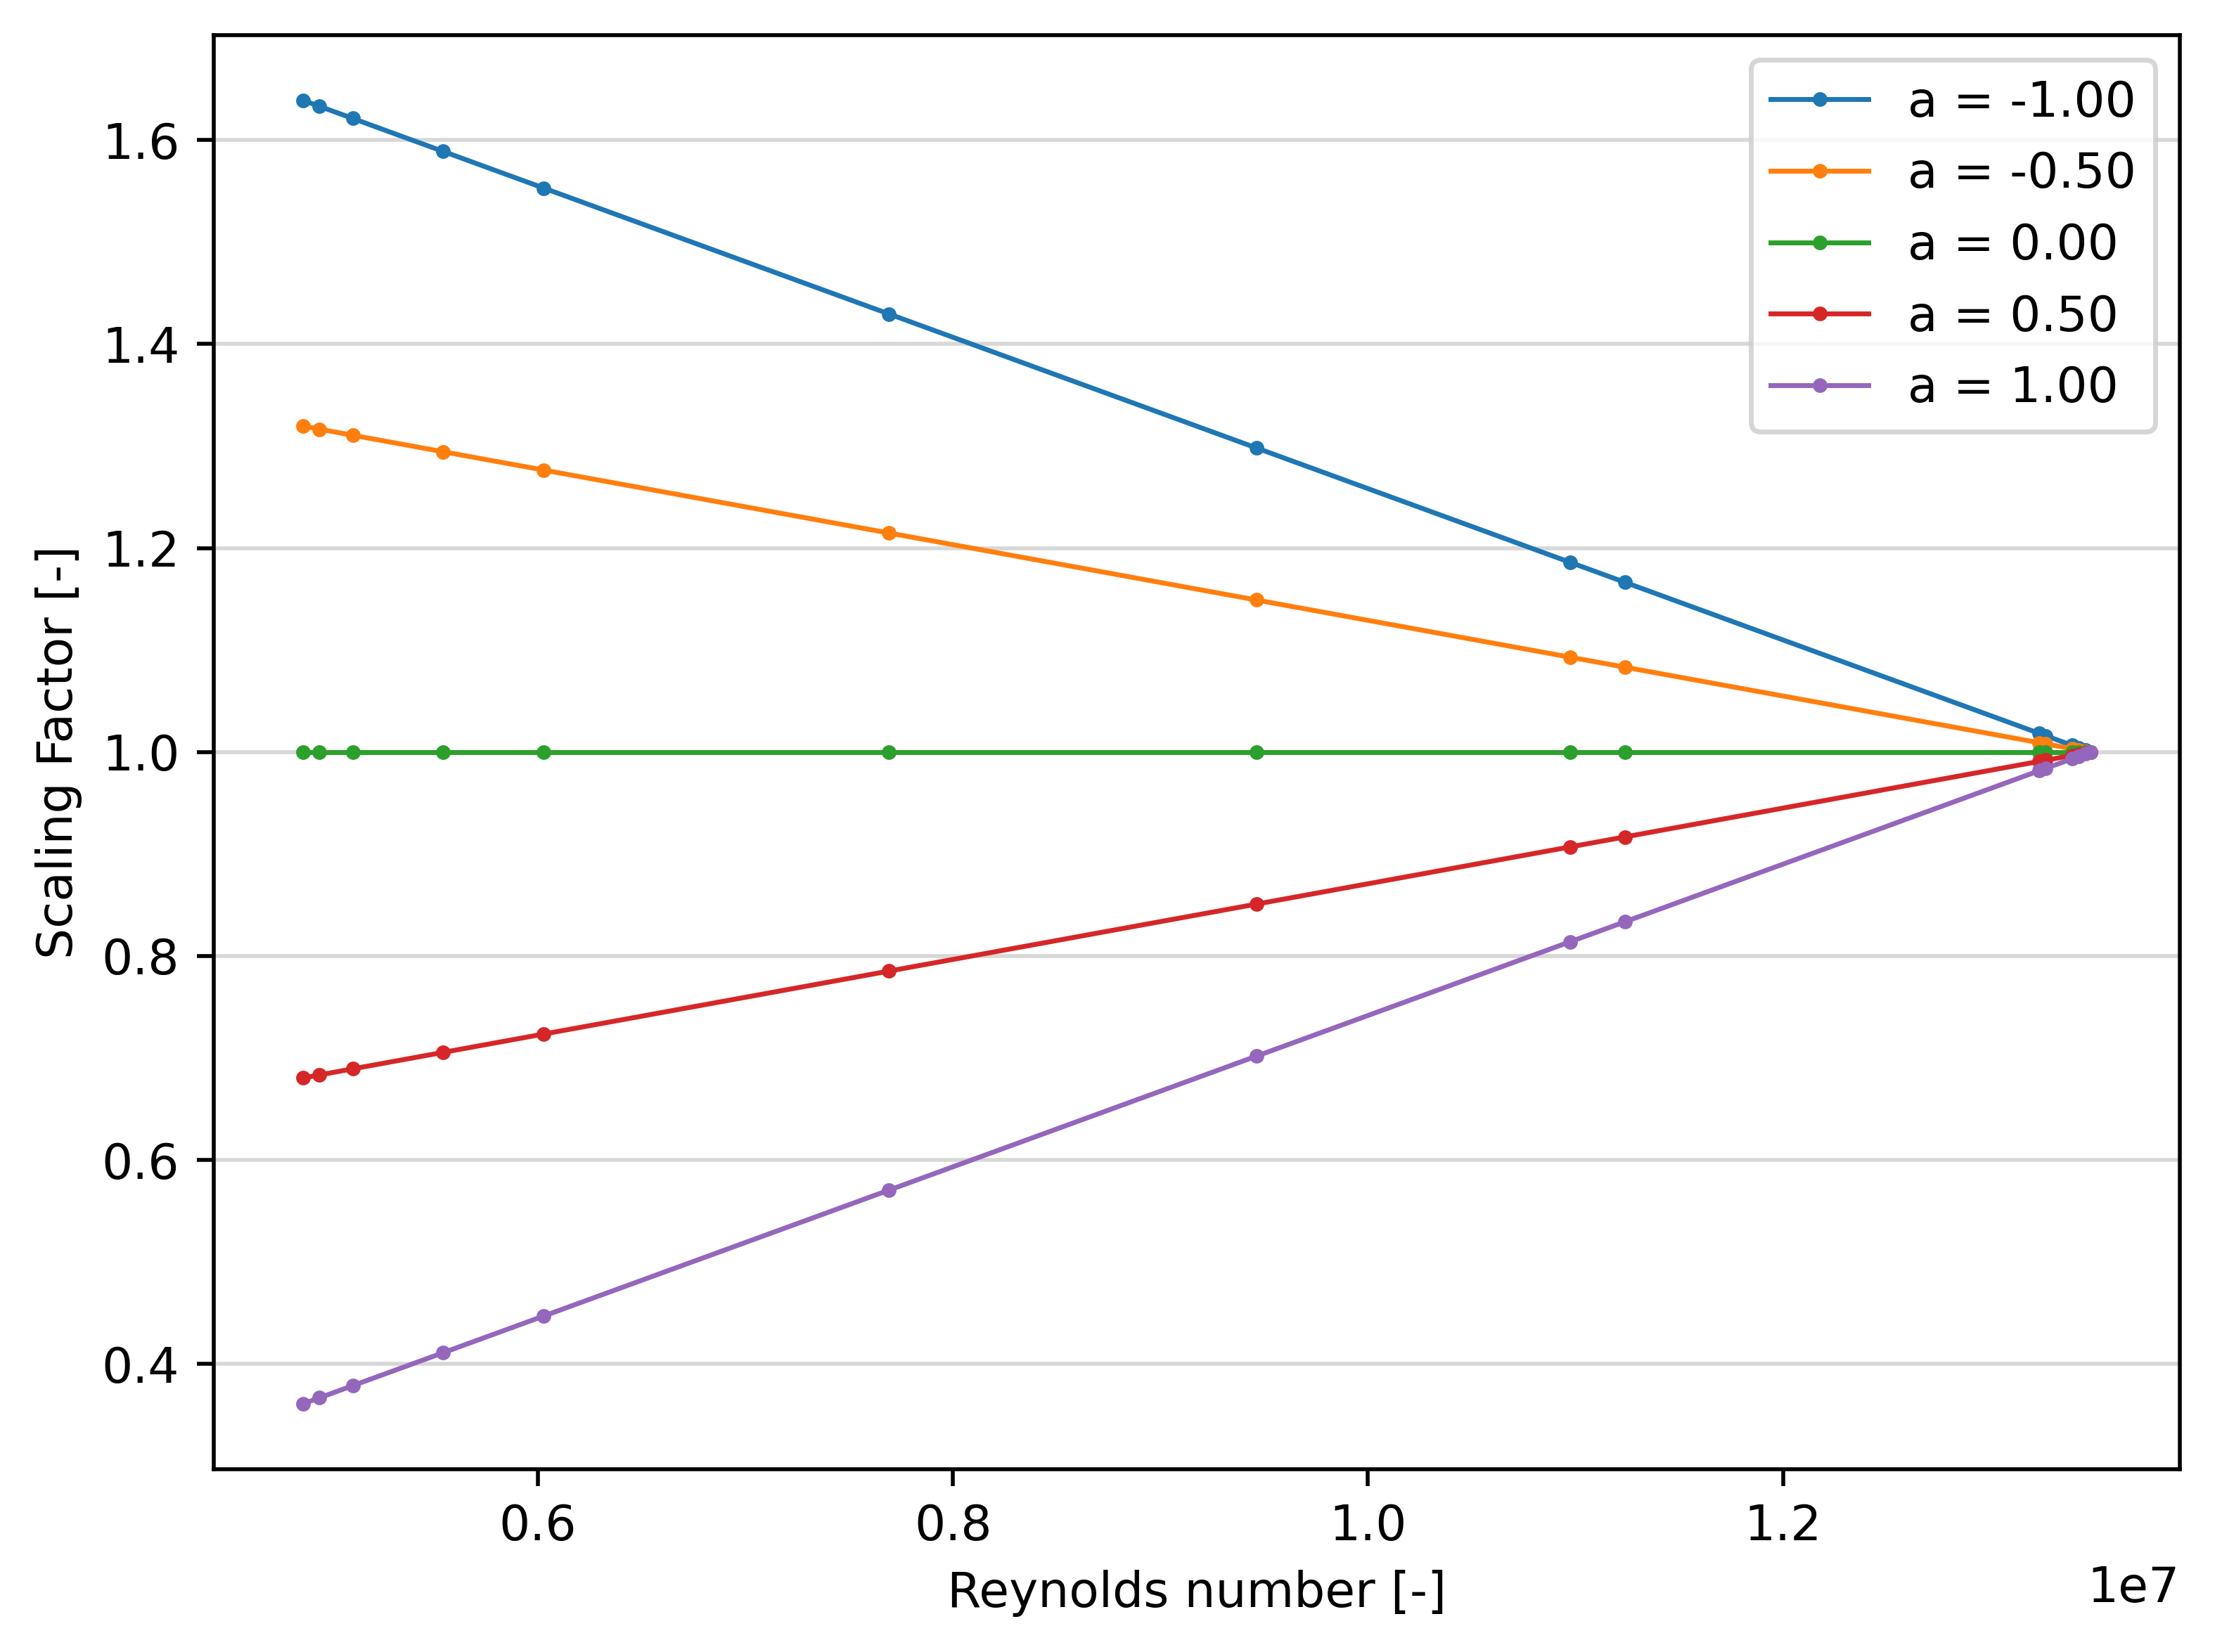

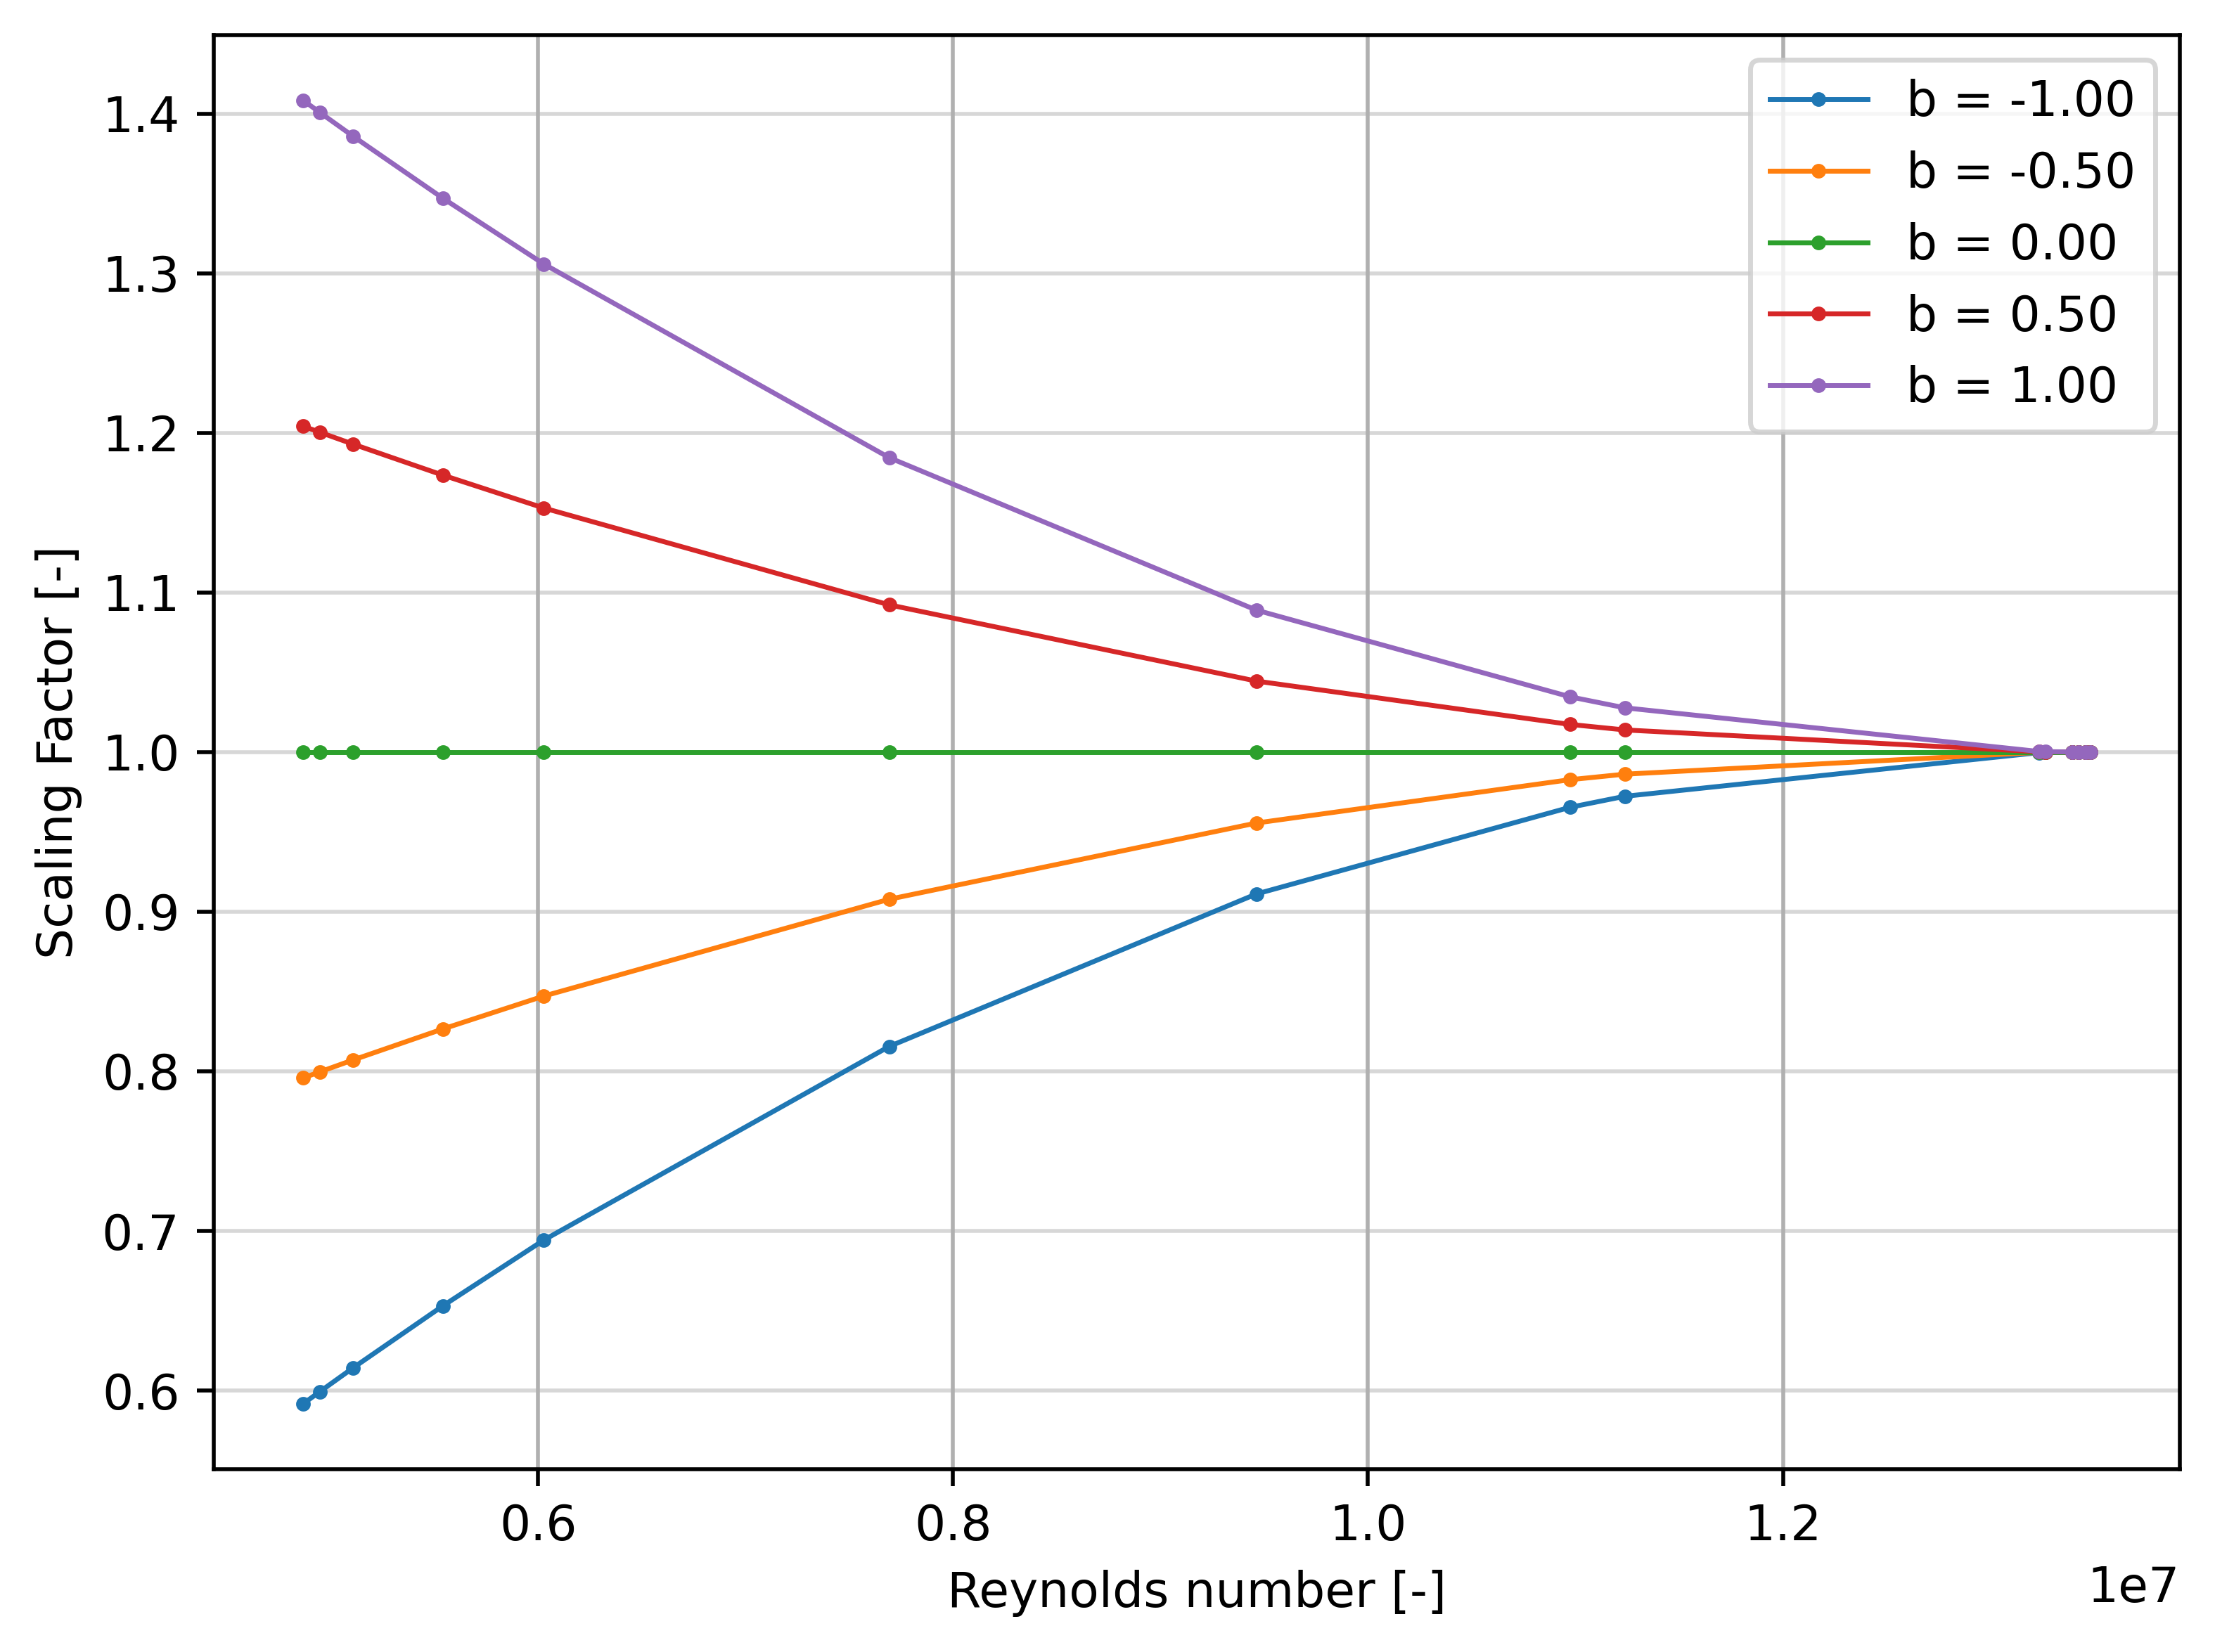

In [13]:
def plot_coefficients_effect(file_name):
    GEnx_OD, GEnx_OD_true, alt_time, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))
    
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
    
    Re2_DP = Re2[0]
    Re25_DP = Re25[0]
    Re19_DP = Re19[0]
    Re3_DP = Re3[0]
    Re4_DP = Re4[0]
    Re49_DP = Re49[0]
    Re5_DP = Re5[0]
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T

    def plot_a_cnst_b(ab_array, DP, OD, title):
#         plt.title(title)
        plt.figure(dpi=500)
        lower_a, upper_a, lower_b, upper_b = ab_array
        colors = ['b', 'g', 'r', 'c', 'm']  # You can customize the colors
        markers = ['o', 's', 'D', '^', 'v']  # You can customize the markers
        for i, a in enumerate(np.linspace(lower_a, upper_a, 5)):
            label = f'a = {a:.2f}'  # Label for the legend
            SF = scaling_F(DP, np.sort(OD), a, 0)
            plt.plot(np.sort(OD), SF, label=label, marker='.', markersize=4, linewidth=1)
        plt.ylabel("Scaling Factor [-]")
        plt.xlabel("Reynolds number [-]")
#         plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.gca().grid(True, alpha=0.5, axis='y')
        plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
                   + title + '.jpeg')
        plt.show()
    
    ab_array = [-1, 1, 0, 0]
    plot_a_cnst_b(ab_array, Re2_DP, Re2, "Scaling function with b = const")
    
    def plot_b_cnst_a(ab_array, DP, OD, title):
#         plt.title(title)
        plt.figure(dpi=500)
        lower_a, upper_a, lower_b, upper_b = ab_array
        colors = ['b', 'g', 'r', 'c', 'm']  # You can customize the colors
        markers = ['o', 's', 'D', '^', 'v']  # You can customize the markers
        for i, b in enumerate(np.linspace(lower_b, upper_b, 5)):
            label = f'b = {b:.2f}'  # Label for the legend
            SF = scaling_F(DP, np.sort(OD), 0, b)
            plt.plot(np.sort(OD), SF, label=label, marker='.', markersize=4,linewidth=1)
        plt.ylabel("Scaling Factor [-]")
        plt.xlabel("Reynolds number [-]")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.gca().grid(True, alpha=0.5, axis='y')
        plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
                   + title + '.jpeg')
        plt.show()
        
    ab_array = [0, 0, -1, 1]
    plot_b_cnst_a(ab_array, Re2_DP, Re2, "Scaling function with a = const")
    

plot_coefficients_effect(file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled")

In [14]:
# def filter_outliers_1d(data):
#     print(f'data size at the beginning {data.shape}')
#     if len(data) == 0:
#         print("data is empty")
#         pass
#     else:
#         q1 = np.percentile(data, 25)
#         q3 = np.percentile(data, 75)
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr
#         condition = (data >= lower_bound) & (data <= upper_bound)
#         print(sum(condition))
#     return condition

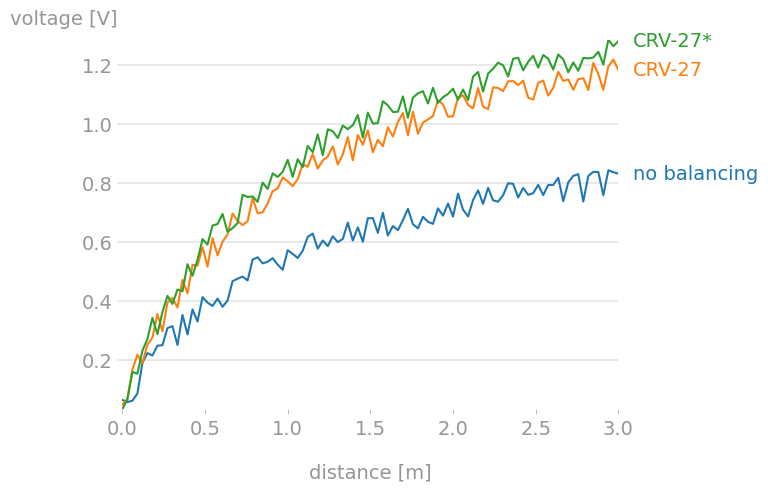

In [15]:
import dufte
def line():
    rng = np.random.default_rng(0)

    offsets = [1.0, 1.50, 1.60]
    labels = ["no balancing", "CRV-27", "CRV-27*"]
    x0 = np.linspace(0.0, 3.0, 100)
    y = [offset * x0 / (x0 + 1) + 0.1 * rng.random(len(x0)) for offset in offsets]

    # dufte
    with plt.style.context(dufte.style):
        for yy, label in zip(y, labels):
            plt.plot(x0, yy, label=label)
        plt.xlabel("distance [m]")
        dufte.ylabel("voltage [V]")
        dufte.legend()
#         plt.savefig("ex1-dufte.svg", transparent=True, bbox_inches="tight")
        plt.show()
        plt.close()

line()

In [16]:
from matplotlib.ticker import ScalarFormatter
from sklearn.ensemble import IsolationForest

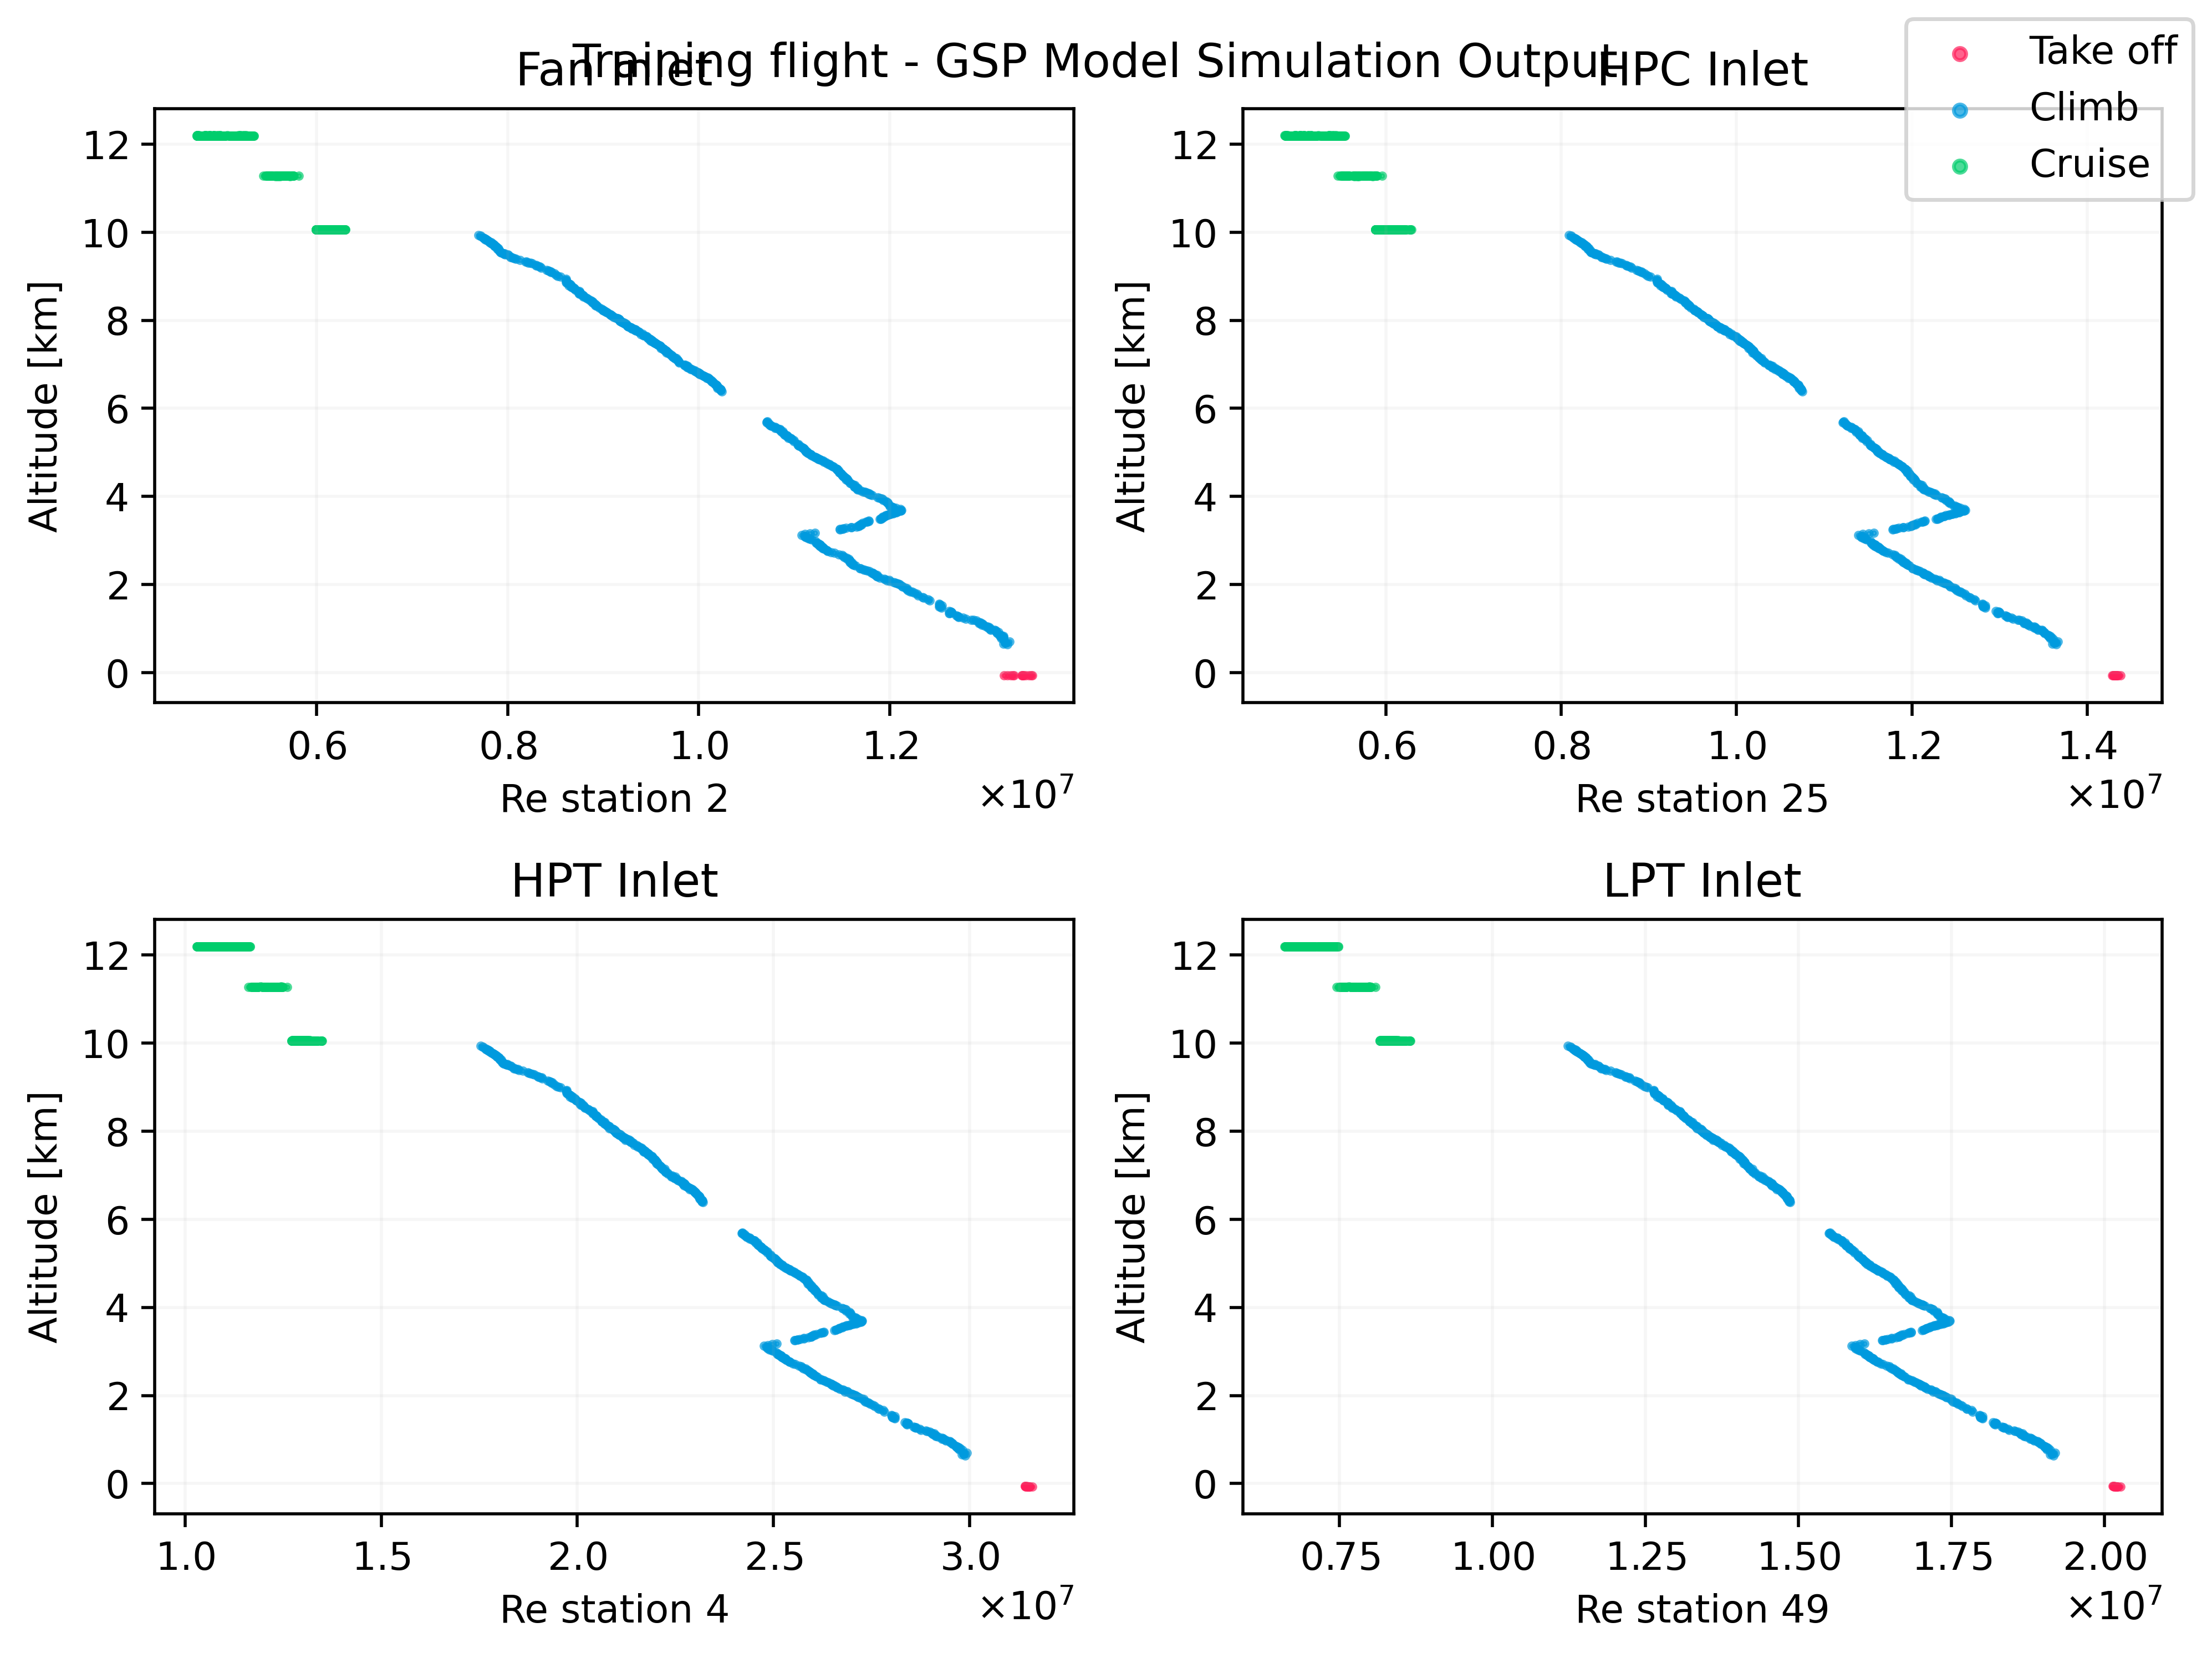

In [82]:
file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2"
GEnx_OD, GEnx_OD_true, _, alt_time, All_Reynolds = pickle.load(open(f"Reynolds_pickle/{file_name}.p", "rb"))
take_off_All_Reynolds, climb_All_Reynolds, cruise_All_Reynolds = All_Reynolds
Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = np.array(take_off_All_Reynolds).T

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=500)
fig_title = "Training flight - GSP Model Simulation Output"
for flight_phase, legend, color in zip(range(3), ['Take off', 'Climb', 'Cruise'], ['#FF1F5B', '#009ADE', '#00CD6C']):
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = np.array(All_Reynolds[flight_phase]).T

    
    for ax, data, label, title in zip(axes.flat, 
                                     [Re2, Re25, Re4, Re49],
                                     ['Re2', 'Re25', 'Re4', 'Re49'], 
                                     ['Fan Inlet', 'HPC Inlet', 'HPT Inlet', 'LPT Inlet']):
        
        alt, time = np.array(alt_time[flight_phase]).T
        alt = alt * 0.3048 / 1000
        

#         data = filtered_data[:, 0]
#         alt = filtered_data[:, 1]

        
        
        ax.scatter(x=data, y=alt, s=2, alpha=0.7,label=legend, c=color)
        ax.set_xlabel(f'Re station {label.strip("Re")}')
        ax.set_ylabel('Altitude [km]')
        ax.grid(True, alpha=0.1)
        ax.set_title(title)
        
        # Use ScalarFormatter for the y-axis
        x_formatter = ScalarFormatter(useMathText=True)
        x_formatter.set_scientific(True)
        x_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for x-axis
        
        y_formatter = ScalarFormatter(useMathText=True)
        y_formatter.set_scientific(True)
#         y_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for y-axis
        
        ax.xaxis.set_major_formatter(x_formatter)
        ax.yaxis.set_major_formatter(y_formatter)

        
# Adjust spacing between subplots
plt.tight_layout()
legends = fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
for handle in legends.legendHandles:
    handle.set_sizes([10])
plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + fig_title + '.jpeg')

fig.suptitle(fig_title)
plt.show()



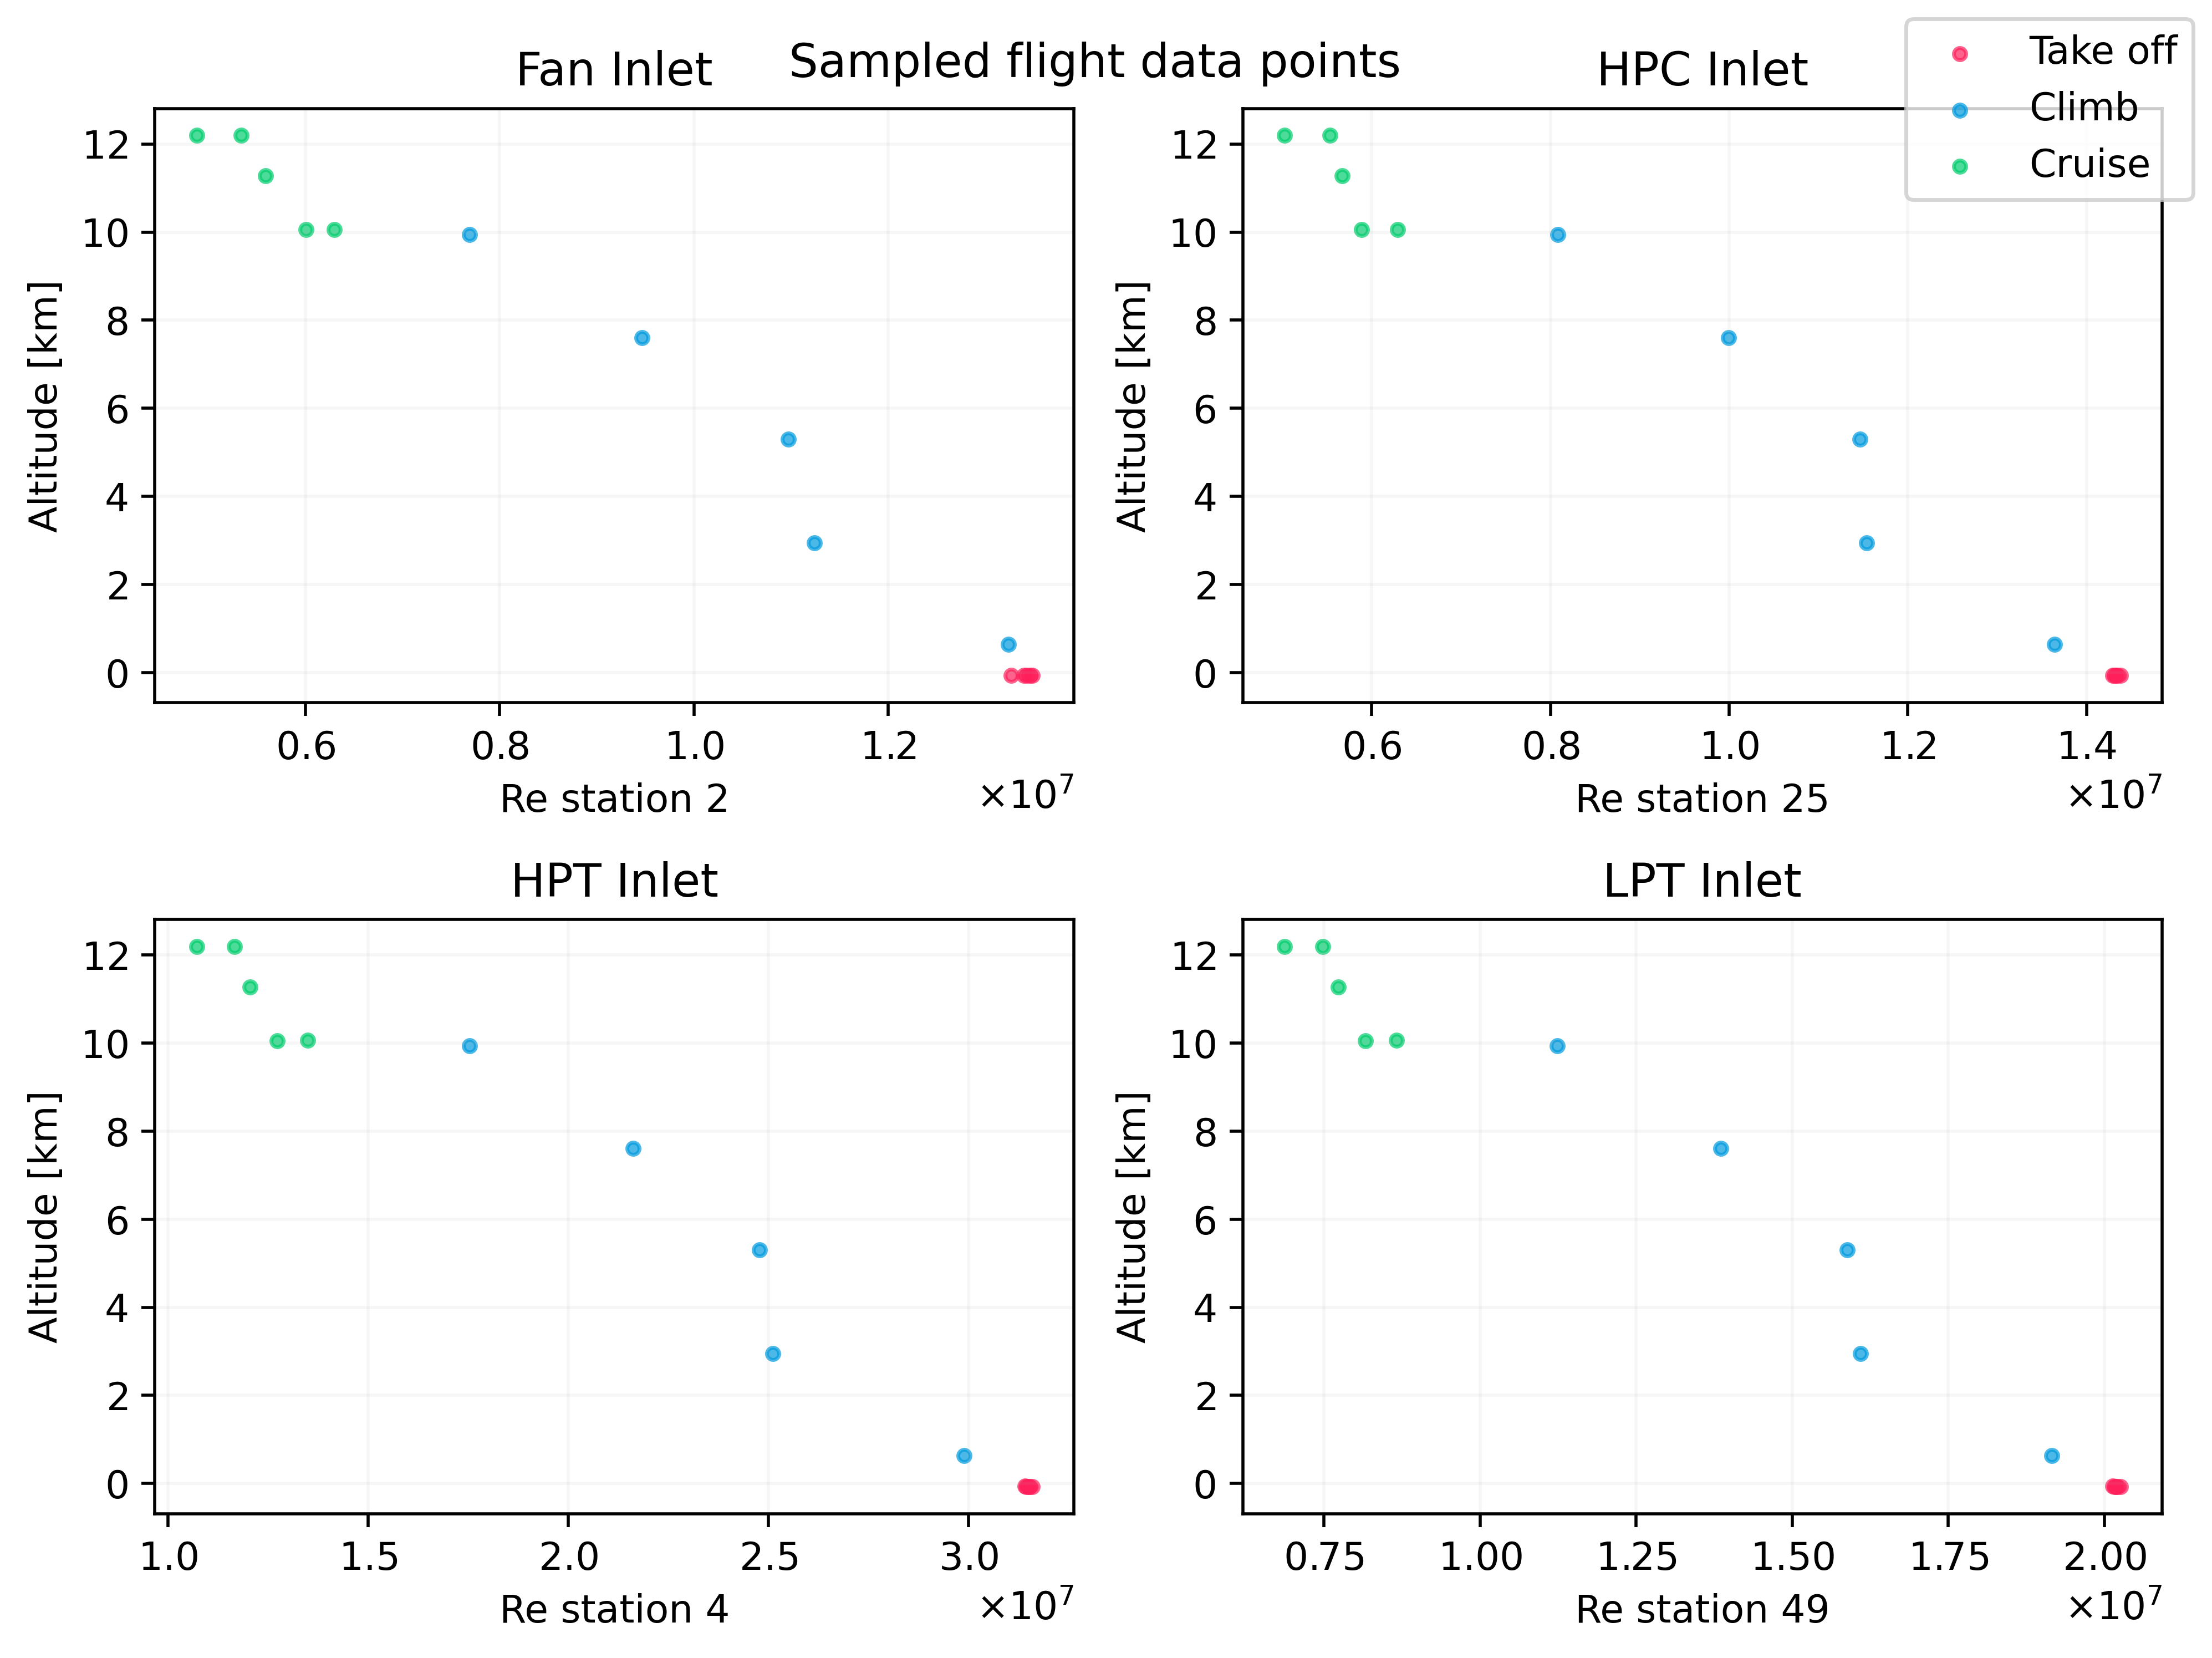

In [93]:
file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled"   
GEnx_OD, GEnx_OD_true, alt_time, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))

fig_title = 'Sampled flight data points'
fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=500)



Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = np.array(All_Reynolds).T
alt, time = np.array(alt_time).T
alt = alt * 0.3048 / 1000

for ax, data, label, title in zip(axes.flat, 
                                 [Re2, Re25, Re4, Re49],
                                 ['Re2', 'Re25', 'Re4', 'Re49'], 
                                 ['Fan Inlet', 'HPC Inlet', 'HPT Inlet', 'LPT Inlet']):

    ax.scatter(x=data[:5], y=alt[:5], s=10, alpha=0.7, label='Take off', c='#FF1F5B')
    ax.scatter(x=data[5:10], y=alt[5:10], s=10, alpha=0.7, label='Climb', c='#009ADE')
    ax.scatter(x=data[10:], y=alt[10:], s=10, alpha=0.7, label='Cruise', c='#00CD6C')
#     ax.plot(data[:5], alt[:5],  label='Take off')
#     ax.plot(data[5:10], alt[5:10], label='Climb')
#     ax.plot(data[10:], alt[10:],  label='Cruise')
    
    ax.set_xlabel(f'Re station {label.strip("Re")}')
    ax.set_ylabel('Altitude [km]')
    ax.grid(True, alpha=0.1)
    ax.set_title(title)

    # Use ScalarFormatter for the y-axis
    x_formatter = ScalarFormatter(useMathText=True)
    x_formatter.set_scientific(True)
    x_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for x-axis

    y_formatter = ScalarFormatter(useMathText=True)
    y_formatter.set_scientific(True)
#     y_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for y-axis

    ax.xaxis.set_major_formatter(x_formatter)
    ax.yaxis.set_major_formatter(y_formatter)
        
# Adjust spacing between subplots
plt.tight_layout()
legends = fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
for handle in legends.legendHandles:
    handle.set_sizes([10])
plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + fig_title + '.jpeg')
fig.suptitle(fig_title)
plt.show()


In [72]:
iter_time, iter_Xi= pickle.load(open("New solves OD scaling/Solver Output.p", "rb"))
print(iter_Xi[-1])



[-0.03556189  0.03731023  0.08991043  0.19880645 -0.07541231 -0.01267174
 -0.04084452  0.0274358   0.02555529 -0.12721143  0.00536253 -0.02147563
 -0.02743118  0.05253129 -0.09999875  0.0999978 ]
